<a href="https://colab.research.google.com/github/ZackYovel/GA-for-Hyper-Parameter-Tuning/blob/MLK/GA_alpha_male.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Genetic Algorithm for Hyper Parameter Tuning

## Using data from the kaggle Housing Prices Competition for Kaggle Learn Users

Using multiple populations.

Competition URL: https://www.kaggle.com/c/home-data-for-ml-course

In [1]:
# Imports
import pandas as pd
import numpy as np
from numpy.random import default_rng
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import concurrent.futures
import random
import json
import os
import heapq
import time
import logging

random_gen = default_rng()

In [2]:
# Data load
project_files_path = os.path.join("drive", "My Drive", "Colab Notebooks", "GA_alpha_male")

train = pd.read_csv(os.path.join(project_files_path, "train.csv"))
X_test = pd.read_csv(os.path.join(project_files_path, "test.csv"))

X = train.drop(['SalePrice'], axis=1)
y = train.SalePrice

X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=0)

In [3]:
# Preprocess data

numerical_columns = [col for col in X_train.columns if X_train[col].dtype != 'object']
categorical_columns = [col for col in X_train.columns if X_train[col].dtype == 'object']

most_frequent_num_imputer = SimpleImputer(strategy='most_frequent')
most_frequent_cat_imputer = SimpleImputer(strategy='most_frequent')

low_cardinality_cols = [col for col in categorical_columns if X_train[col].nunique() < 10]
high_cardinality_cols = set(categorical_columns) - set(low_cardinality_cols)
good_label_cols = [col for col in high_cardinality_cols if set(X_train[col]).issuperset(set(X_cv[col]))]

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

ordinal_encoder = OrdinalEncoder()

numerical_transformer = most_frequent_num_imputer

categorical_low_card_transformer = Pipeline(
    steps=[
           ('impute', most_frequent_cat_imputer),
           ('encode', OH_encoder)
    ]
)

categorical_high_card_transformer = Pipeline(
    steps=[
           ('impute', most_frequent_cat_imputer),
           ('encode', ordinal_encoder)
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
                  ('num', numerical_transformer, numerical_columns),
                  ('cat_low_card', categorical_low_card_transformer, low_cardinality_cols),
                  ('cat_high_card', categorical_high_card_transformer, good_label_cols)
    ]
)


X_train_prepped = preprocessor.fit_transform(X_train)
X_cv_prepped = preprocessor.transform(X_cv)
X_test_prepped = preprocessor.transform(X_test)

In [4]:
def model_from_hp(hp):
  return RandomForestRegressor(n_estimators=hp['n_estimators'],
                               criterion='mae',
                               max_depth=hp['max_depth'],
                               min_samples_split=hp['min_samples_split'],
                               min_samples_leaf=hp['min_samples_leaf'],
                               min_weight_fraction_leaf=hp['min_weight_fraction_leaf'],
                               max_features=hp['max_features'],
                               max_leaf_nodes=hp['max_leaf_nodes'],
                               min_impurity_decrease=hp['min_impurity_decrease'],
                               bootstrap=hp['bootstrap'],
                               oob_score=hp['oob_score'],
                               n_jobs=-1,
                               ccp_alpha=hp['ccp_alpha'],
                               max_samples=hp['max_samples'])

## Hyper Parameter Tuning Using a Genetic Algorithm

### Algorithm Description:
1. Prepare generation 0: initialize n_territories teritories each of which has pop_size instances of hyper parameter sets with random values in it's population.
2. For each generation (steps 3-16):
3. For each teritory (steps 4-14):
4. For each specimen in the population (steps 5-7):
5. Build a model based on the specimen
6. Evaluate the model
7. While unevaluated specimen remain go back to step 4.
8. Breed population until it reaches pop_size:
9. While population size is less than pop_size (steps 10-13):
10. Randomly select two distinct parent specimen (give higher chances to reproduce to specimen with better fit value).
11. Create a new specimen by randomly "inheriting" hyper parameter values from the parents
12. Mutate the new specimen:
for numerical hyper parameters add a value chosen randomly from a normal ditribution with mean 0 and standard deviation of approximately mutation_factor times the size of the range of legal values.
for boolean hyper parameters choose randomly giving the existing value a probability of 1 - mutation_factor to be chosen again.
13. While population size is less than pop_size return to step 9
14. While not all teritories processed return to step 3
15. Compute: mutation_factor = 0.1 * (number of teritories that need drift + 1)
(a population needs drift if the average improvement of it's n_survivors best specimen is less than drift_threshold)
16. While not processed all generations go back to step 2.
17. Return best set of hyper parameters.

**************************************************************************************************** 
Generation 40/500
..................................................................................................
Best MAE for teritory 3 is 27503.044716386135 . Average improvement is 0.005067767102457932
.............................................
Best MAE for teritory 0 is 24311.24920163574 . Average improvement is 0.0
...Finished evaluating teritory 3
Finished evaluating teritory 0
.
Best MAE for teritory 2 is 25662.451182425135 . Average improvement is 0.02141780617672806
Finished evaluating teritory 2
..
Best MAE for teritory 1 is 27318.846140995654 . Average improvement is 0.00860714906990534
Finished evaluating teritory 1
.
Best MAE for teritory 4 is 28121.68930847557 . Average improvement is -0.017430772132732586
Finished evaluating teritory 4
Need drift: 2
This generation took 0:07:17 to process.
Remaining 459 generations and approximately 55:34:16
Average improvement fo

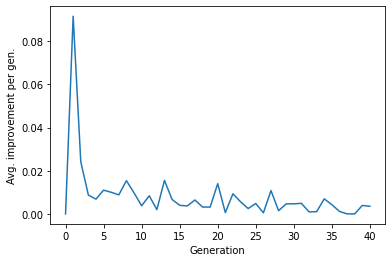

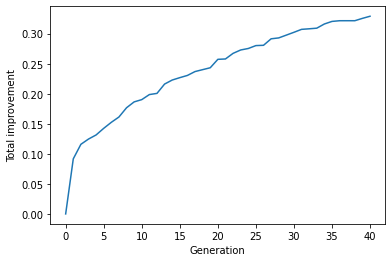

**************************************************************************************************** 
Generation 41/500
..................................................................................
Best MAE for teritory 1 is 27318.846140995654 . Average improvement is 0.0
......................
Best MAE for teritory 0 is 24311.24920163574 . Average improvement is 0.0012023198254043077
....
Best MAE for teritory 2 is 25662.451182425135 . Average improvement is 0.026636682516117727
...................................
Best MAE for teritory 3 is 26931.18106740211 . Average improvement is 0.020483064672640605
...Finished evaluating teritory 1
Finished evaluating teritory 0
Finished evaluating teritory 2
Finished evaluating teritory 3
....
Best MAE for teritory 4 is 28197.529636459432 . Average improvement is -0.002768180254084762
Finished evaluating teritory 4
Need drift: 2
This generation took 0:06:51 to process.
Remaining 458 generations and approximately 53:53:46
Average improvement

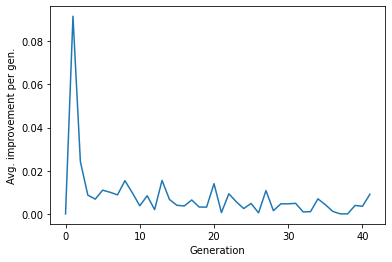

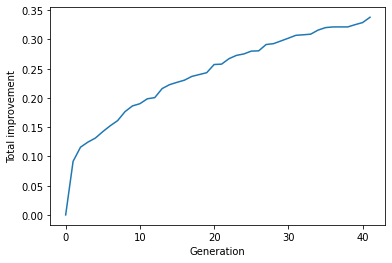

**************************************************************************************************** 
Generation 42/500
..................................................
Best MAE for teritory 0 is 24311.24920163574 . Average improvement is -0.016836907010670754
...................................
Best MAE for teritory 1 is 27318.846140995654 . Average improvement is 0.014444422502397192
.......................................................
Best MAE for teritory 2 is 25662.451182425135 . Average improvement is 0.0
......Finished evaluating teritory 0
Finished evaluating teritory 1
Finished evaluating teritory 2
..
Best MAE for teritory 3 is 26931.18106740211 . Average improvement is 0.0
Finished evaluating teritory 3
..
Best MAE for teritory 4 is 27024.338884412216 . Average improvement is 0.026806469646897924
Finished evaluating teritory 4
Need drift: 3
This generation took 0:05:49 to process.
Remaining 457 generations and approximately 49:05:52
Average improvement for generation: 0

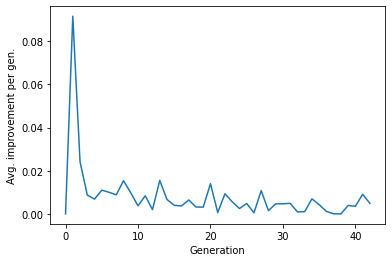

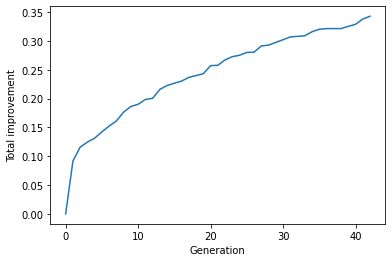

**************************************************************************************************** 
Generation 43/500
.......................................................................
Best MAE for teritory 0 is 24311.24920163574 . Average improvement is -0.007152994963079196
.............
Best MAE for teritory 1 is 27318.846140995654 . Average improvement is 0.0
..............................................................Finished evaluating teritory 0
Finished evaluating teritory 1
..
Best MAE for teritory 3 is 26931.18106740211 . Average improvement is 0.00845651142638304
Finished evaluating teritory 3
.
Best MAE for teritory 4 is 27024.338884412216 . Average improvement is 0.0
Finished evaluating teritory 4
.
Best MAE for teritory 2 is 25662.451182425135 . Average improvement is -0.0012702411217275777
Finished evaluating teritory 2
Need drift: 4
This generation took 0:09:03 to process.
Remaining 456 generations and approximately 58:54:42
Average improvement for generation: 

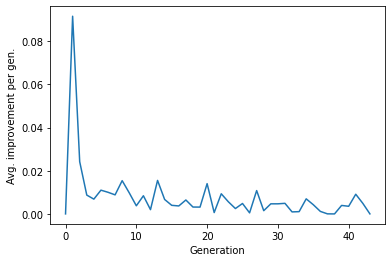

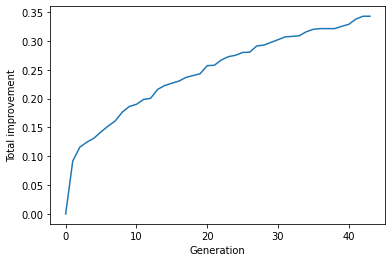

**************************************************************************************************** 
Generation 44/500
..........................................................................
Best MAE for teritory 0 is 24311.24920163574 . Average improvement is -0.008915901278766625
.............................
Best MAE for teritory 1 is 26292.974247918344 . Average improvement is 0.009888643354215576
.....................................
Best MAE for teritory 2 is 25662.451182425135 . Average improvement is -0.0010935427169478373
......Finished evaluating teritory 0
Finished evaluating teritory 1
Finished evaluating teritory 2
...
Best MAE for teritory 3 is 26931.18106740211 . Average improvement is -0.009890843576518815
Finished evaluating teritory 3
.
Best MAE for teritory 4 is 27024.338884412216 . Average improvement is 0.013081048497256997
Finished evaluating teritory 4
Need drift: 3
This generation took 0:06:27 to process.
Remaining 455 generations and approximately 53:54:10


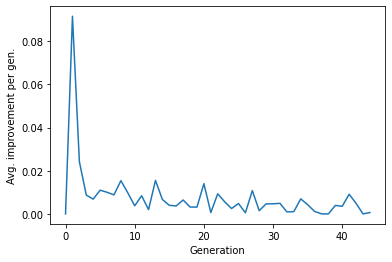

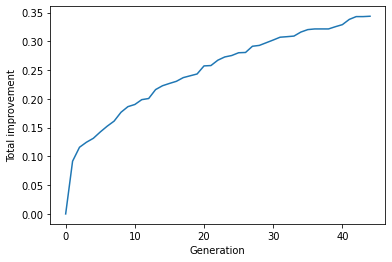

**************************************************************************************************** 
Generation 45/500
...............................................................................
Best MAE for teritory 1 is 25662.451182425135 . Average improvement is 0.01842183611572401
..........................
Best MAE for teritory 2 is 26695.242488853364 . Average improvement is -0.015470225628007372
............................
Best MAE for teritory 0 is 24311.24920163574 . Average improvement is 0.012568640905536999
.............Finished evaluating teritory 1
Finished evaluating teritory 2
Finished evaluating teritory 0
...
Best MAE for teritory 3 is 26931.18106740211 . Average improvement is -0.0029937913829568563
Finished evaluating teritory 3
.
Best MAE for teritory 4 is 27024.338884412216 . Average improvement is -0.004999911413539948
Finished evaluating teritory 4
Need drift: 3
This generation took 0:06:45 to process.
Remaining 454 generations and approximately 52:27:59
A

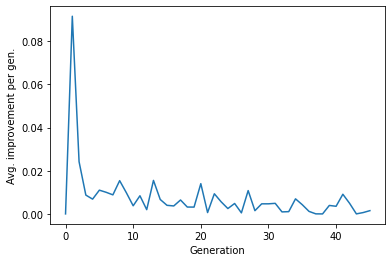

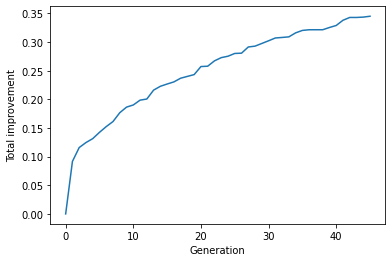

**************************************************************************************************** 
Generation 46/500
...................................................................................
Best MAE for teritory 1 is 25662.451182425135 . Average improvement is 0.005761676168393626
.............
Best MAE for teritory 0 .is 24311.24920163574 .. Average improvement is 0.010887324295292045
.........
Best MAE for teritory 2 is 26695.242488853364 . Average improvement is -0.0009044335535530745
.......................................Finished evaluating teritory 1
Finished evaluating teritory 0
Finished evaluating teritory 2
...
Best MAE for teritory 3 is 26931.18106740211 . Average improvement is -0.010556550713053947
Finished evaluating teritory 3
.
Best MAE for teritory 4 is 27024.338884412216 . Average improvement is -0.001656083269416131
Finished evaluating teritory 4
Need drift: 3
This generation took 0:10:00 to process.
Remaining 453 generations and approximately 63:57:00


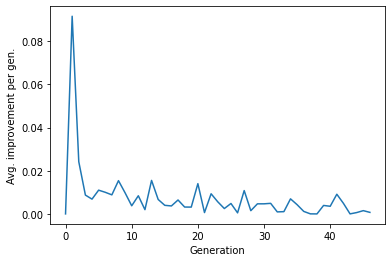

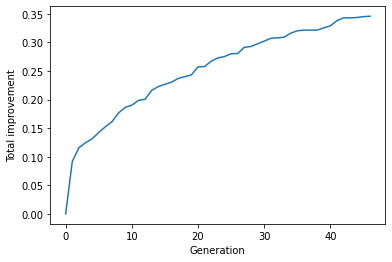

**************************************************************************************************** 
Generation 47/500
....................................................................................
Best MAE for teritory 0 is 24311.24920163574 . Average improvement is 0.008775590963553181
..............
Best MAE for teritory 1 is 25662.451182425135 . Average improvement is 0.01215157565882996
...............
Best MAE for teritory 2 is 26695.242488853364 . Average improvement is 0.001648341215481075
.................................Finished evaluating teritory 0
Finished evaluating teritory 1
Finished evaluating teritory 2
..
Best MAE for teritory 3 is 26931.18106740211 . Average improvement is 0.01115904060963202
Finished evaluating teritory 3
..
Best MAE for teritory 4 is 27024.338884412216 . Average improvement is -0.0013898349649825725
Finished evaluating teritory 4
Need drift: 1
This generation took 0:09:59 to process.
Remaining 452 generations and approximately 69:33:50
Aver

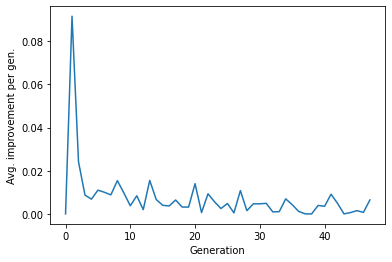

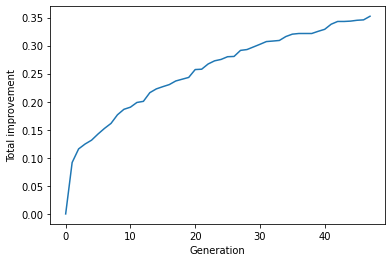

**************************************************************************************************** 
Generation 48/500
......................................................
Best MAE for teritory 0 is 24311.24920163574 . Average improvement is 0.0
...................................................................................
Best MAE for teritory 2 is 26695.242488853364 . Average improvement is 0.0
....
Best MAE for teritory 3 is 26931.18106740211 . Average improvement is 0.0
.....Finished evaluating teritory 0
Finished evaluating teritory 2
Finished evaluating teritory 3
..
Best MAE for teritory 1 is 25662.451182425135 . Average improvement is -0.0010019991439648157
Finished evaluating teritory 1
..
Best MAE for teritory 4 is 27024.338884412216 . Average improvement is 0.0009815723376409569
Finished evaluating teritory 4
Need drift: 4
This generation took 0:04:48 to process.
Remaining 451 generations and approximately 52:48:25
Average improvement for generation: -4.0853612647717

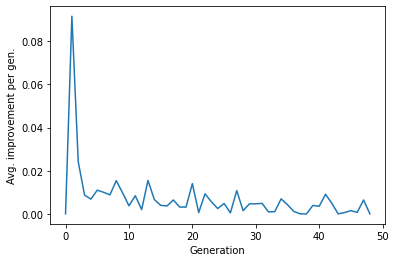

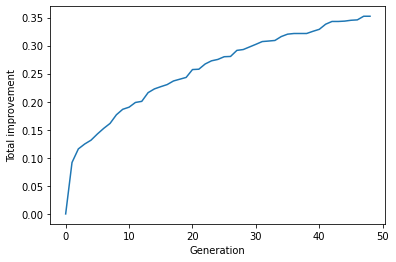

**************************************************************************************************** 
Generation 49/500
.....................................................
Best MAE for teritory 0 is 24311.24920163574 . Average improvement is -0.0032159028322714667
..............................
Best MAE for teritory 1 is 25662.451182425135 . Average improvement is -0.007336159134837872
.....................................................
Best MAE for teritory 2 is 26695.242488853364 . Average improvement is 0.0153784816263145
..........Finished evaluating teritory 0
Finished evaluating teritory 1
Finished evaluating teritory 2
...
Best MAE for teritory 4 is 27024.338884412216 . Average improvement is -0.001816259753488092
Finished evaluating teritory 4
.
Best MAE for teritory 3 is 26931.18106740211 . Average improvement is 0.008522755443538532
Finished evaluating teritory 3
Need drift: 3
This generation took 0:06:21 to process.
Remaining 450 generations and approximately 50:11:13
Av

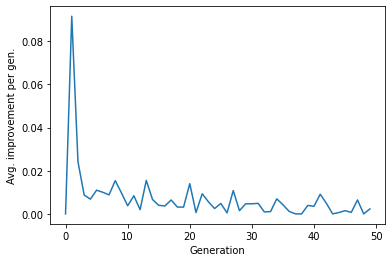

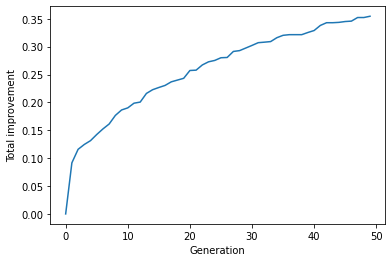

**************************************************************************************************** 
Generation 50/500
...............................................................................
Best MAE for teritory 0 is 27503.044716386135 . Average improvement is -0.014833475281033626
..
Best MAE for teritory 1 is 25662.451182425135 . Average improvement is -0.002635860343814911
...................................................
Best MAE for teritory 2 is 24311.24920163574 . Average improvement is 0.010291344207260078
..............Finished evaluating teritory 0
Finished evaluating teritory 1
Finished evaluating teritory 2
..
Best MAE for teritory 3 is 26931.18106740211 . Average improvement is 0.00867471244308371
Finished evaluating teritory 3
..
Best MAE for teritory 4 is 26918.12270547945 . Average improvement is 0.007409890486124393
Finished evaluating teritory 4
Need drift: 2
This generation took 0:07:04 to process.
Remaining 449 generations and approximately 51:32:08
Aver

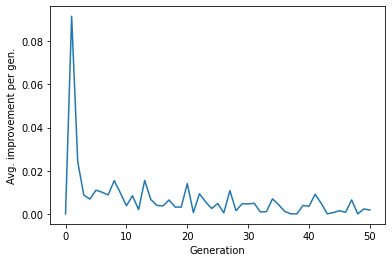

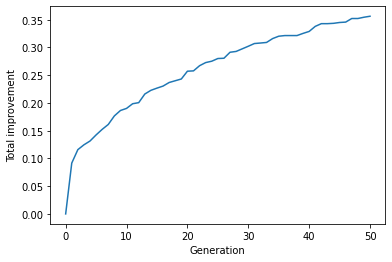

**************************************************************************************************** 
Generation 51/500
..............................................................................
Best MAE for teritory 0 is 27697.882768361582 . Average improvement is 0.004454368306586964
..
Best MAE for teritory 1 is 25662.451182425135 . Average improvement is -0.0021688169426988813
..................................
Best MAE for teritory 2 is 24311.24920163574 . Average improvement is 0.003003985967545919
................................Finished evaluating teritory 0
Finished evaluating teritory 1
Finished evaluating teritory 2
..
Best MAE for teritory 3 is 26931.18106740211 . Average improvement is 0.007878212284973873
Finished evaluating teritory 3
..
Best MAE for teritory 4 is 26918.12270547945 . Average improvement is 0.0
Finished evaluating teritory 4
Need drift: 2
This generation took 0:08:07 to process.
Remaining 448 generations and approximately 56:03:57
Average improvement 

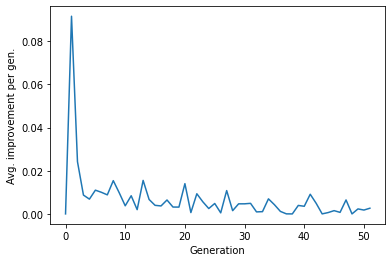

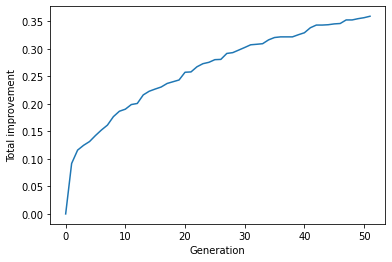

**************************************************************************************************** 
Generation 52/500
..............................................
Best MAE for teritory 0 is 21916.90990561597 . Average improvement is 0.0248113031819599
...................................................................
Best MAE for teritory 1 is 25662.451182425135 . Average improvement is 0.0015511878865521744
.......................
Best MAE for teritory 2 is 24311.24920163574 . Average improvement is 0.0
.....
Best MAE for teritory 3 is 26931.18106740211 . Average improvement is 0.0
.....Finished evaluating teritory 0
Finished evaluating teritory 1
Finished evaluating teritory 2
Finished evaluating teritory 3
....
Best MAE for teritory 4 is 26918.12270547945 . Average improvement is -0.016142915689723814
Finished evaluating teritory 4
Need drift: 3
This generation took 0:06:24 to process.
Remaining 447 generations and approximately 51:51:38
Average improvement for generation: 0.00

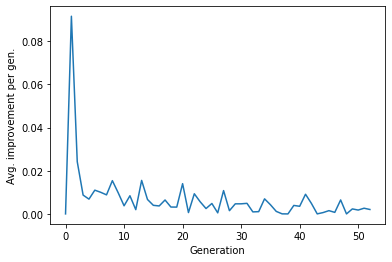

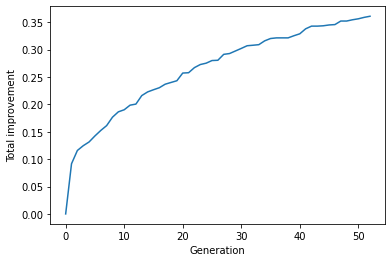

**************************************************************************************************** 
Generation 53/500
............................................................................
Best MAE for teritory 0 is 21916.90990561597 . Average improvement is 0.0
.....
Best MAE for teritory 1 is 25662.451182425135 . Average improvement is -0.002466834150137598
.........................................................
Best MAE for teritory 3 is 26931.18106740211 . Average improvement is -2.5024846174948046e-05
........Finished evaluating teritory 0
Finished evaluating teritory 1
Finished evaluating teritory 3
...
Best MAE for teritory 2 is 24311.24920163574 . Average improvement is 0.013752986681758284
Finished evaluating teritory 2
.
Best MAE for teritory 4 is 26918.12270547945 . Average improvement is 0.00233062671913431
Finished evaluating teritory 4
Need drift: 3
This generation took 0:12:04 to process.
Remaining 446 generations and approximately 70:45:40
Average improvement 

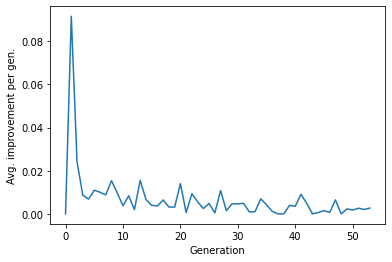

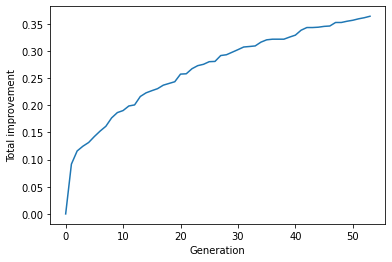

**************************************************************************************************** 
Generation 54/500
.....................................................
Best MAE for teritory 0 is 21916.90990561597 . Average improvement is 0.015358764438404116
............................................................
Best MAE for teritory 2 is 24311.24920163574 . Average improvement is 0.0
.........................
Best MAE for teritory 3 is 26931.18106740211 . Average improvement is -0.004521997962777413
........Finished evaluating teritory 0
Finished evaluating teritory 2
Finished evaluating teritory 3
..
Best MAE for teritory 1 is 25662.451182425135 . Average improvement is -0.00924765250514581
Finished evaluating teritory 1
..
Best MAE for teritory 4 is 26918.12270547945 . Average improvement is 0.016571614206688734
Finished evaluating teritory 4
Need drift: 3
This generation took 0:11:01 to process.
Remaining 445 generations and approximately 76:12:03
Average improvement fo

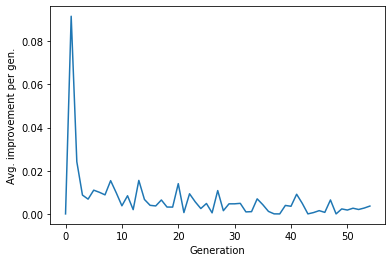

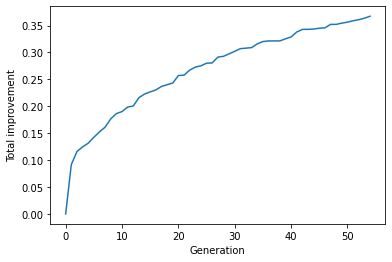

**************************************************************************************************** 
Generation 55/500
.............................................................................
Best MAE for teritory 0 is 21916.90990561597 . Average improvement is 0.0
..............................
Best MAE for teritory 2 is 24311.24920163574 . Average improvement is -0.0067382142842948856
...
Best MAE for teritory 1 is 25662.451182425135 . Average improvement is -0.0017776103945691402
....................................Finished evaluating teritory 0
Finished evaluating teritory 2
Finished evaluating teritory 1
...
Best MAE for teritory 3 is 26931.18106740211 . Average improvement is 0.008929924206606321
Finished evaluating teritory 3
.
Best MAE for teritory 4 is 26918.12270547945 . Average improvement is 0.0
Finished evaluating teritory 4
Need drift: 4
This generation took 0:09:47 to process.
Remaining 444 generations and approximately 74:14:45
Average improvement for generation: 

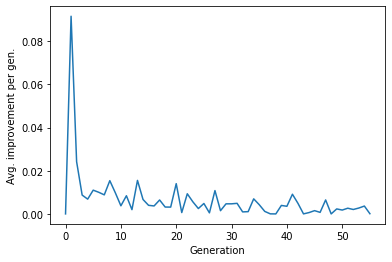

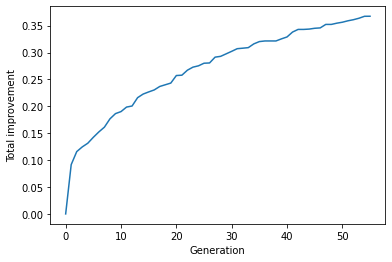

**************************************************************************************************** 
Generation 56/500
..............................................................................
Best MAE for teritory 1 is 25662.451182425135 . Average improvement is -0.0012339025321316255
.......................
Best MAE for teritory 0 is 21916.90990561597 . Average improvement is -0.000858902010278273
.......................................
Best MAE for teritory 3 is 26447.791706166754 . Average improvement is 0.010932752335240492
......Finished evaluating teritory 1
Finished evaluating teritory 0
Finished evaluating teritory 3
...
Best MAE for teritory 2 is 24311.24920163574 . Average improvement is 0.0031507639876062754
Finished evaluating teritory 2
.
Best MAE for teritory 4 is 26311.662229105194 . Average improvement is 0.021181279605995806
Finished evaluating teritory 4
Need drift: 2
This generation took 0:08:21 to process.
Remaining 443 generations and approximately 67:52:45


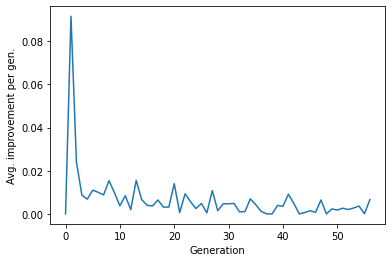

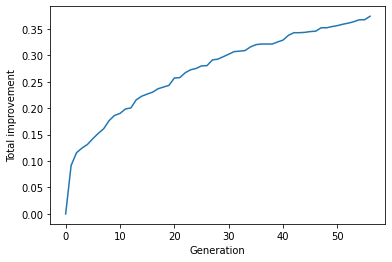

**************************************************************************************************** 
Generation 57/500
.............................................................................................................
Best MAE for teritory 2 is 24311.24920163574 . Average improvement is 0.0
....
Best MAE for teritory 1 is 21916.90990561597 . Average improvement is 0.01315507051926601
.................................Finished evaluating teritory 2
Finished evaluating teritory 1
.
Best MAE for teritory 4 is 26311.662229105194 . Average improvement is 0.0
Finished evaluating teritory 4
..
Best MAE for teritory 0 is 26292.974247918344 . Average improvement is -0.010314070413657506
Finished evaluating teritory 0
.
Best MAE for teritory 3 is 26447.791706166754 . Average improvement is 0.0
Finished evaluating teritory 3
Need drift: 4
This generation took 0:13:11 to process.
Remaining 442 generations and approximately 82:28:37
Average improvement for generation: 0.00056820002112170

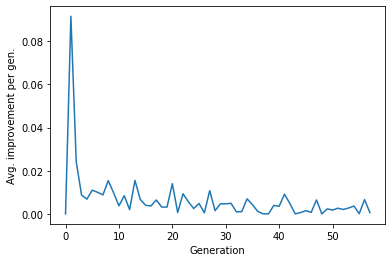

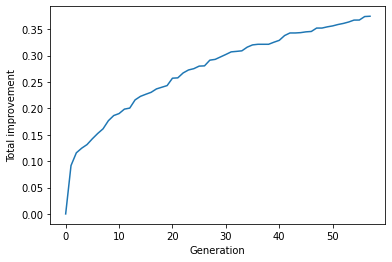

**************************************************************************************************** 
Generation 58/500
............................................................................
Best MAE for teritory 1 is 21916.90990561597 . Average improvement is 0.017764127252891226
.
Best MAE for teritory 0 is 26292.974247918344 . Average improvement is -0.00014004477559603767
.................................
Best MAE for teritory 2 is 26763.654801905253 . Average improvement is -0.017683919542818227
..................................
Best MAE for teritory 3 is 26931.18106740211 . Average improvement is 0.003943217969602175
..Finished evaluating teritory 1
Finished evaluating teritory 0
Finished evaluating teritory 2
Finished evaluating teritory 3
....
Best MAE for teritory 4 is 20183.89484680647 . Average improvement is 0.0318750189022321
Finished evaluating teritory 4
Need drift: 2
This generation took 0:15:08 to process.
Remaining 441 generations and approximately 96:47:58
Ave

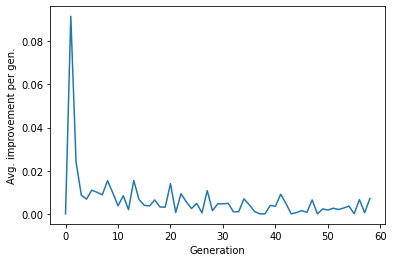

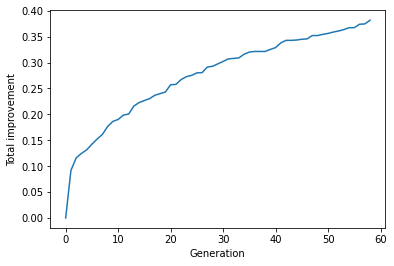

**************************************************************************************************** 
Generation 59/500
.........................................................................
Best MAE for teritory 0 is 27697.882768361582 . Average improvement is -0.009667764883012797
...............................
Best MAE for teritory 2 is 26763.654801905253 . Average improvement is 0.007661809568748401
...............................
Best MAE for teritory 1 is 21916.90990561597 . Average improvement is 0.0
.
Best MAE for teritory 3 is 26931.18106740211 . Average improvement is -0.00042839851995279954
..........Finished evaluating teritory 0
Finished evaluating teritory 2
Finished evaluating teritory 3
Finished evaluating teritory 1
....
Best MAE for teritory 4 is 20183.89484680647 . Average improvement is 0.01005047686049343
Finished evaluating teritory 4
Need drift: 3
This generation took 0:08:05 to process.
Remaining 440 generations and approximately 77:57:31
Average improvement

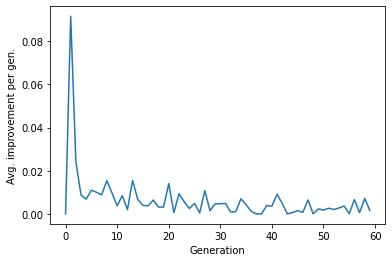

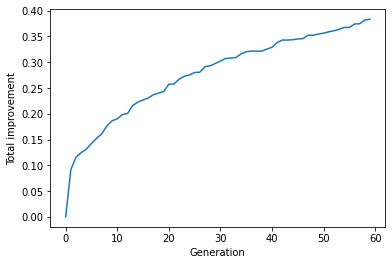

**************************************************************************************************** 
Generation 60/500
...................................................
Best MAE for teritory 0 is 27836.78653560538 . Average improvement is -0.0028028129185840855
.....................................................
Best MAE for teritory 1 is 21916.90990561597 . Average improvement is 0.01465904107900351
.................................
Best MAE for teritory 3 is 26931.18106740211 . Average improvement is 0.0018764320433353188
.....
Best MAE for teritory 2 is 26763.654801905253 . Average improvement is 0.0
....Finished evaluating teritory 0
Finished evaluating teritory 1
Finished evaluating teritory 3
Finished evaluating teritory 2
....
Best MAE for teritory 4 is 20183.89484680647 . Average improvement is 0.0
Finished evaluating teritory 4
Need drift: 3
This generation took 0:08:13 to process.
Remaining 439 generations and approximately 68:58:55
Average improvement for generation: 0.

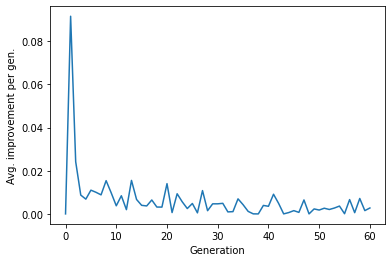

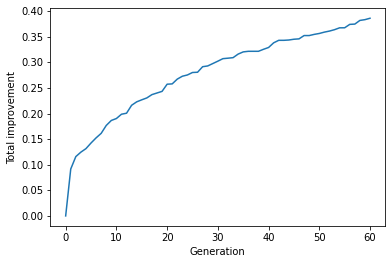

**************************************************************************************************** 
Generation 61/500
.......................................................................
Best MAE for teritory 1 is 21916.90990561597 . Average improvement is 0.0
.........
Best MAE for teritory 0 is 27836.78653560538 . Average improvement is 0.0032450319110135517
....................................................
Best MAE for teritory 3 is 26931.18106740211 . Average improvement is -0.0021140912532748857
..............Finished evaluating teritory 1
Finished evaluating teritory 0
Finished evaluating teritory 3
...
Best MAE for teritory 4 is 20183.89484680647 . Average improvement is -0.0005293339897156635
Finished evaluating teritory 4
.
Best MAE for teritory 2 is 26763.654801905253 . Average improvement is 0.005192692203907612
Finished evaluating teritory 2
Need drift: 3
This generation took 0:08:20 to process.
Remaining 438 generations and approximately 64:50:59
Average improvemen

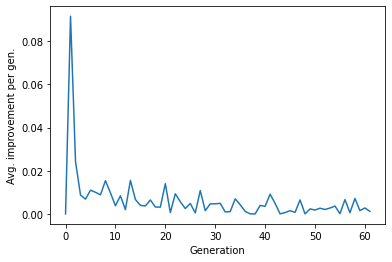

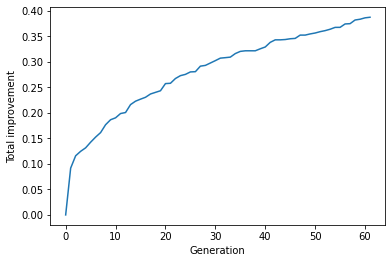

**************************************************************************************************** 
Generation 62/500
....................................................
Best MAE for teritory 0 is 27836.78653560538 . Average improvement is 0.0
......................................................
Best MAE for teritory 2 is 26763.654801905253 . Average improvement is 0.0
.......
Best MAE for teritory 1 is 21916.90990561597 . Average improvement is 0.00708794405371016
.................................Finished evaluating teritory 0
Finished evaluating teritory 2
Finished evaluating teritory 1
...
Best MAE for teritory 4 is 20183.89484680647 . Average improvement is -0.008366209903019062
Finished evaluating teritory 4
.
Best MAE for teritory 3 is 26931.18106740211 . Average improvement is 0.001156685626959808
Finished evaluating teritory 3
Need drift: 3
This generation took 0:09:20 to process.
Remaining 437 generations and approximately 66:21:07
Average improvement for generation: -2.4

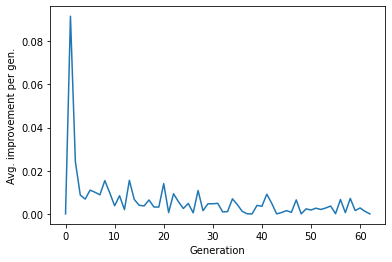

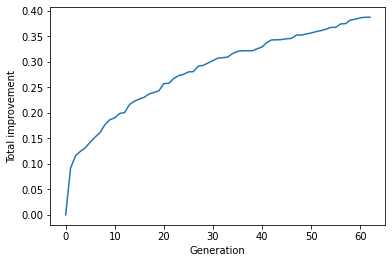

**************************************************************************************************** 
Generation 63/500
...........................................................................
Best MAE for teritory 1 is 21916.90990561597 . Average improvement is 0.0
...........................
Best MAE for teritory 0 is 26292.974247918344 . Average improvement is 0.006330824549062086
..............................
Best MAE for teritory 2 is 26945.517878726838 . Average improvement is -0.0030845332838482786
..............Finished evaluating teritory 1
Finished evaluating teritory 0
Finished evaluating teritory 2
..
Best MAE for teritory 3 is 26763.654801905253 . Average improvement is 0.00217950152101154
Finished evaluating teritory 3
..
Best MAE for teritory 4 is 20183.89484680647 . Average improvement is -0.00550942562002632
Finished evaluating teritory 4
Need drift: 3
This generation took 0:03:40 to process.
Remaining 436 generations and approximately 46:28:07
Average improvement 

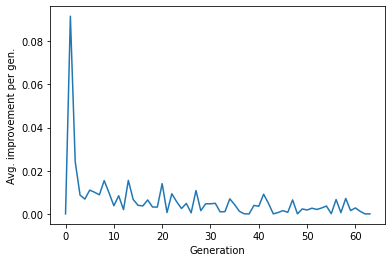

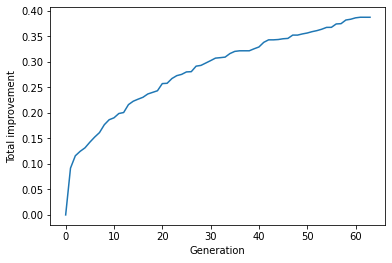

**************************************************************************************************** 
Generation 64/500
...............................................
Best MAE for teritory 0 is 26292.974247918344 . Average improvement is 0.0
..............................................................
Best MAE for teritory 2 is 26931.18106740211 . Average improvement is -0.00041857484000829004
.....................................Finished evaluating teritory 0
Finished evaluating teritory 2
.
Best MAE for teritory 3 is 26763.654801905253 . Average improvement is -0.0009035837022273174
Finished evaluating teritory 3
..
Best MAE for teritory 1 is 21916.90990561597 . Average improvement is -0.00433117309632447
Finished evaluating teritory 1
.
Best MAE for teritory 4 is 20183.89484680647 . Average improvement is 0.005760286270479309
Finished evaluating teritory 4
Need drift: 4
This generation took 0:05:29 to process.
Remaining 435 generations and approximately 43:06:24
Average improveme

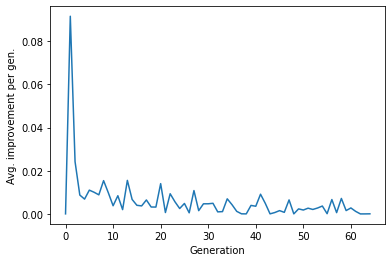

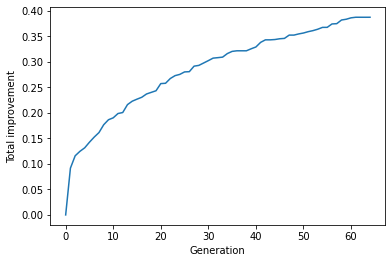

**************************************************************************************************** 
Generation 65/500
..................................................
Best MAE for teritory 0 is 26292.974247918344 . Average improvement is -0.004339568170861008
...................................................
Best MAE for teritory 1 is 21916.90990561597 . Average improvement is -0.011123660912086941
.............
Best MAE for teritory 2 is 25662.451182425135 . Average improvement is 0.010908425004678701
................................Finished evaluating teritory 0
Finished evaluating teritory 1
Finished evaluating teritory 2
...
Best MAE for teritory 3 is 26763.654801905253 . Average improvement is 0.0010222399591441889
Finished evaluating teritory 3
.
Best MAE for teritory 4 is 20183.89484680647 . Average improvement is 0.005560673089263668
Finished evaluating teritory 4
Need drift: 2
This generation took 0:08:44 to process.
Remaining 434 generations and approximately 53:05:39
A

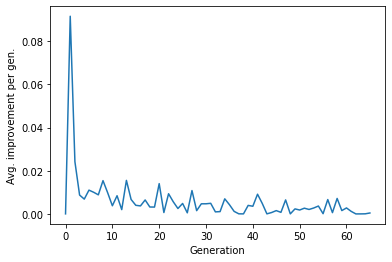

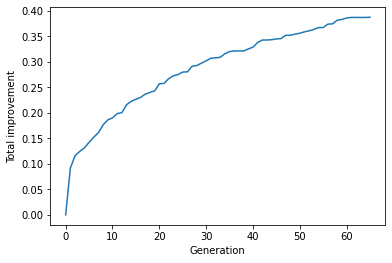

**************************************************************************************************** 
Generation 66/500
................................................
Best MAE for teritory 0 is 26292.974247918344 . Average improvement is 0.0038026683427383468
....................................................................................
Best MAE for teritory 2 is 25662.451182425135 . Average improvement is -0.002459743159747285
.........
Best MAE for teritory 1 is 21916.90990561597 . Average improvement is 0.013029603185551686
.....Finished evaluating teritory 0
Finished evaluating teritory 2
Finished evaluating teritory 1
...
Best MAE for teritory 4 is 20183.89484680647 . Average improvement is 0.006519260248529779
Finished evaluating teritory 4
.
Best MAE for teritory 3 is 26763.654801905253 . Average improvement is 0.0025623076314083004
Finished evaluating teritory 3
Need drift: 1
This generation took 0:04:55 to process.
Remaining 433 generations and approximately 44:15:07
A

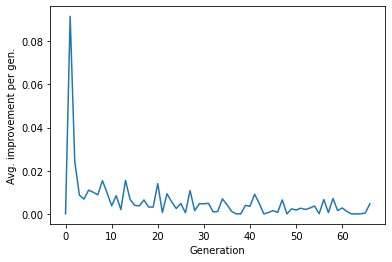

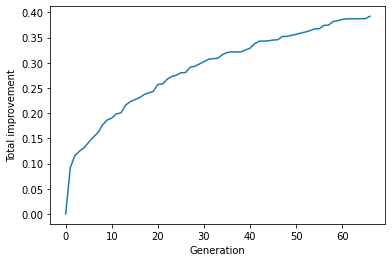

**************************************************************************************************** 
Generation 67/500
.......................................................................
Best MAE for teritory 0 is 26292.974247918344 . Average improvement is 0.0014819228746825175
.........................................
Best MAE for teritory 2 is 21916.90990561597 . Average improvement is 0.02622169443015432
...........................
Best MAE for teritory 3 is 26763.654801905253 . Average improvement is 0.0
.......Finished evaluating teritory 0
Finished evaluating teritory 2
Finished evaluating teritory 3
...
Best MAE for teritory 4 is 20183.89484680647 . Average improvement is 0.0
Finished evaluating teritory 4
.
Best MAE for teritory 1 is 24311.24920163574 . Average improvement is -0.01642250985878624
Finished evaluating teritory 1
Need drift: 3
This generation took 0:09:53 to process.
Remaining 432 generations and approximately 57:41:12
Average improvement for generation: 0.0

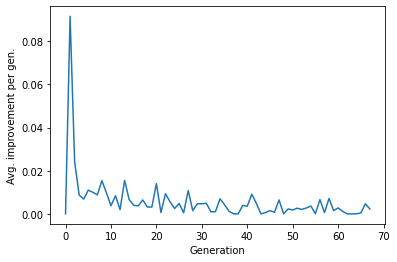

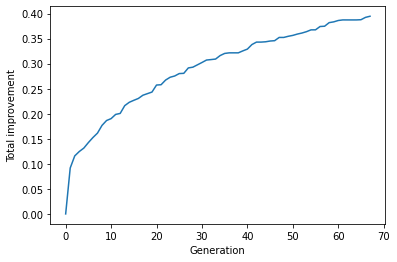

**************************************************************************************************** 
Generation 68/500
...................................................
Best MAE for teritory 0 is 26292.974247918344 . Average improvement is 0.0035385101063414304
.........................................................
Best MAE for teritory 2 is 21916.90990561597 . Average improvement is 0.0
............................
Best MAE for teritory 3 is 26559.046919284367 . Average improvement is 0.008469498438530954
..........Finished evaluating teritory 0
Finished evaluating teritory 2
Finished evaluating teritory 3
...
Best MAE for teritory 4 is 20183.89484680647 . Average improvement is -0.004182886241601347
Finished evaluating teritory 4
.
Best MAE for teritory 1 is 24311.24920163574 . Average improvement is 0.005987747404148314
Finished evaluating teritory 1
Need drift: 2
This generation took 0:06:54 to process.
Remaining 431 generations and approximately 53:37:04
Average improvement 

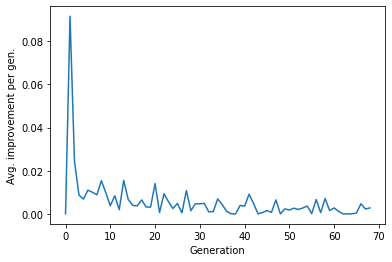

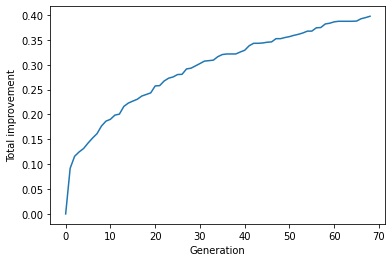

**************************************************************************************************** 
Generation 69/500
....................................................
Best MAE for teritory 0 is 26292.974247918344 . Average improvement is 0.0
..........................................................
Best MAE for teritory 2 is 25662.451182425135 . Average improvement is -0.014557810540772653
......................
Best MAE for teritory 1 is 24311.24920163574 . Average improvement is 0.0
..............Finished evaluating teritory 0
Finished evaluating teritory 2
Finished evaluating teritory 1
..
Best MAE for teritory 3 is 26559.046919284367 . Average improvement is 0.0
Finished evaluating teritory 3
..
Best MAE for teritory 4 is 20183.89484680647 . Average improvement is 0.030689776329484886
Finished evaluating teritory 4
Need drift: 4
This generation took 0:10:15 to process.
Remaining 430 generations and approximately 63:31:53
Average improvement for generation: 0.0032263931577424

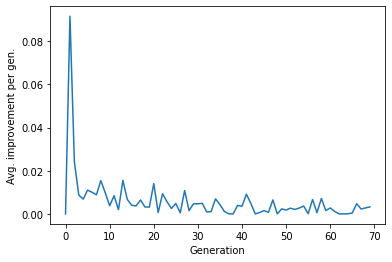

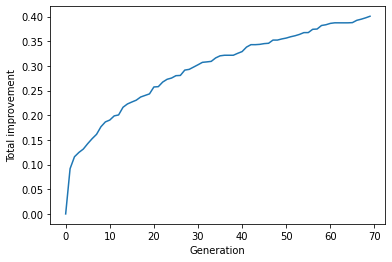

**************************************************************************************************** 
Generation 70/500
.......................................................
Best MAE for teritory 0 is 26695.242488853364... . Average improvement is 0.0012344340190024727
........................
Best MAE for teritory 1 is 24311.24920163574 . Average improvement is -0.0012199437893661846
................................................................
Best MAE for teritory 2 is 20183.89484680647 . Average improvement is 0.029285673287936298
Finished evaluating teritory 0
Finished evaluating teritory 1
Finished evaluating teritory 2
..
Best MAE for teritory 3 is 26292.974247918344 . Average improvement is 0.004513140042008423
Finished evaluating teritory 3
..
Best MAE for teritory 4 is 21916.90990561597 . Average improvement is -0.0287018545910942
Finished evaluating teritory 4
Need drift: 2
This generation took 0:06:28 to process.
Remaining 429 generations and approximately 54:51:31
Ave

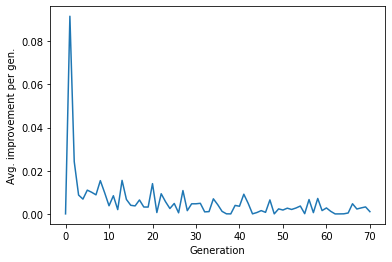

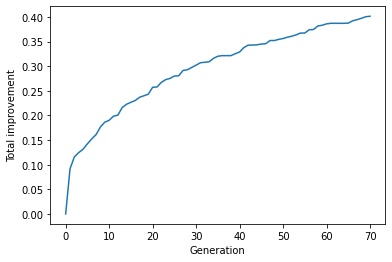

**************************************************************************************************** 
Generation 71/500
..............................................................................
Best MAE for teritory 1 is 24311.24920163574 . Average improvement is 0.0033369128793283576
.......
Best MAE for teritory 0 is 26695.242488853364 . Average improvement is 0.004940337885313673
.........................
Best MAE for teritory 2 is 20183.89484680647 . Average improvement is -0.002193407658681479
....................................Finished evaluating teritory 1
Finished evaluating teritory 0
Finished evaluating teritory 2
..
Best MAE for teritory 3 is 26292.974247918344 . Average improvement is 0.0
Finished evaluating teritory 3
..
Best MAE for teritory 4 is 21916.90990561597 . Average improvement is 0.0031728998110165385
Finished evaluating teritory 4
Need drift: 2
This generation took 0:12:09 to process.
Remaining 428 generations and approximately 70:44:40
Average improvement

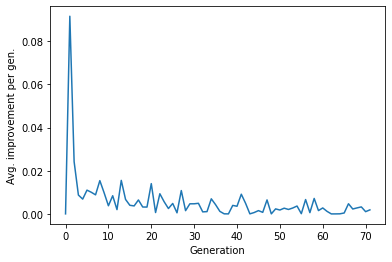

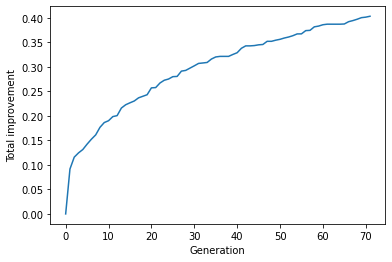

**************************************************************************************************** 
Generation 72/500
............................................................................
Best MAE for teritory 1 is 24311.24920163574 . Average improvement is 0.00231885340553184
....
Best MAE for teritory 0 is 26695.242488853364 . Average improvement is 0.0
.................................
Best MAE for teritory 2 is 20183.89484680647 . Average improvement is -0.0060981886270407015
...........................
Best MAE for teritory 3 is 26292.974247918344 . Average improvement is -0.002364284947108941
......Finished evaluating teritory 1
Finished evaluating teritory 0
Finished evaluating teritory 2
Finished evaluating teritory 3
....
Best MAE for teritory 4 is 21916.90990561597 . Average improvement is 0.0061060456469648194
Finished evaluating teritory 4
Need drift: 3
This generation took 0:14:01 to process.
Remaining 427 generations and approximately 85:10:50
Average improvement

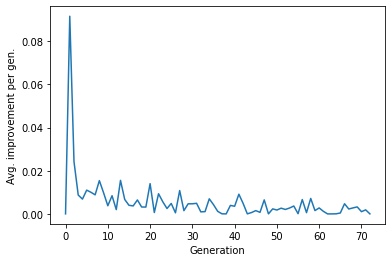

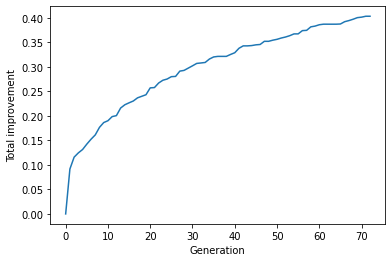

**************************************************************************************************** 
Generation 73/500
..............................................
Best MAE for teritory 0 is 26292.974247918344 . Average improvement is 0.006546002629361114
....................................................................
Best MAE for teritory 1 is 24311.24920163574 . Average improvement is 0.0036722613935842308
...................
Best MAE for teritory 2 is 20183.89484680647 . Average improvement is 0.0033538436032825025
.............Finished evaluating teritory 0
Finished evaluating teritory 1
Finished evaluating teritory 2
.
Best MAE for teritory 3 is 26559.046919284367 . Average improvement is -0.026193327283548284
Finished evaluating teritory 3
...
Best MAE for teritory 4 is 21916.90990561597 . Average improvement is 0.0
Finished evaluating teritory 4
Need drift: 2
This generation took 0:09:46 to process.
Remaining 426 generations and approximately 77:10:34
Average improvement

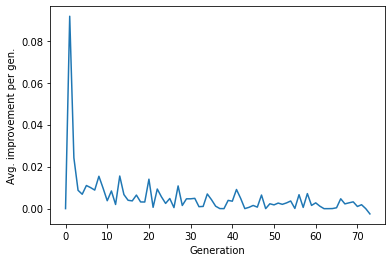

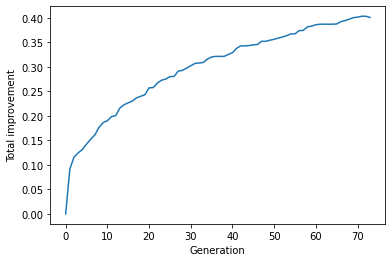

**************************************************************************************************** 
Generation 74/500
...........................................................................
Best MAE for teritory 0 is 26292.974247918344 . Average improvement is 0.0
.....
Best MAE for teritory 1 is 24311.24920163574 . Average improvement is -0.0019482198495699432
..............................................................
Best MAE for teritory 3 is 26559.046919284367 . Average improvement is 0.008268974534966445
....Finished evaluating teritory 0
Finished evaluating teritory 1
Finished evaluating teritory 3
...
Best MAE for teritory 2 is 20183.89484680647 . Average improvement is 0.0
Finished evaluating teritory 2
.
Best MAE for teritory 4 is 21916.90990561597 . Average improvement is -0.0018903072730861448
Finished evaluating teritory 4
Need drift: 4
This generation took 0:08:06 to process.
Remaining 425 generations and approximately 67:11:39
Average improvement for generation:

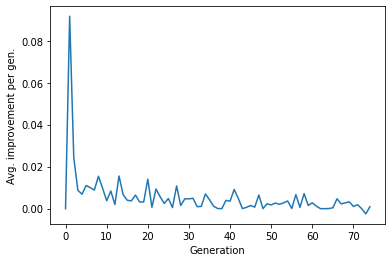

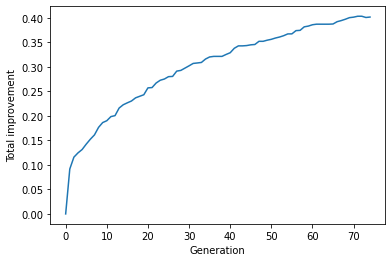

**************************************************************************************************** 
Generation 75/500
...........................................................................
Best MAE for teritory 0 is 26292.974247918344 . Average improvement is 0.004116619944731337
....................................
Best MAE for teritory 1 is 21916.90990561597 . Average improvement is 0.02401218623314305
......
Best MAE for teritory 4 is 24198.44437961411 . Average improvement is -0.03130034554859629
.............................Finished evaluating teritory 0
Finished evaluating teritory 1
Finished evaluating teritory 4
...
Best MAE for teritory 2 is 25662.451182425135 . Average improvement is -0.01456503834310685
Finished evaluating teritory 2
.
Best MAE for teritory 3 is 20183.89484680647 . Average improvement is 0.0358807252251514
Finished evaluating teritory 3
Need drift: 2
This generation took 0:08:28 to process.
Remaining 424 generations and approximately 63:28:33
Average 

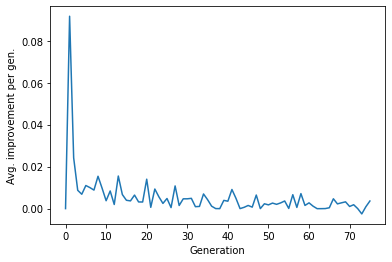

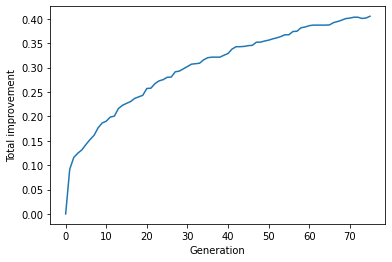

**************************************************************************************************** 
Generation 76/500
.......................................................................................................
Best MAE for teritory 4 is 24198.44437961411 . Average improvement is 0.00348811935250648
...
Best MAE for teritory 0 is 26292.974247918344 . Average improvement is 0.0
............................
Best MAE for teritory 1 is 21916.90990561597 . Average improvement is 0.00949465102130631
............Finished evaluating teritory 4
Finished evaluating teritory 0
Finished evaluating teritory 1
..
Best MAE for teritory 3 is 20183.89484680647 . Average improvement is 0.0006730137417314541
.Finished evaluating teritory 3
.
Best MAE for teritory 2 is 25662.451182425135 . Average improvement is -0.0031239465490958684
Finished evaluating teritory 2
Need drift: 2
This generation took 0:07:45 to process.
Remaining 423 generations and approximately 58:59:13
Average improvement f

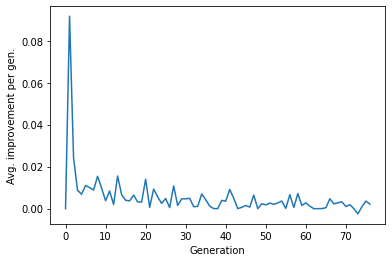

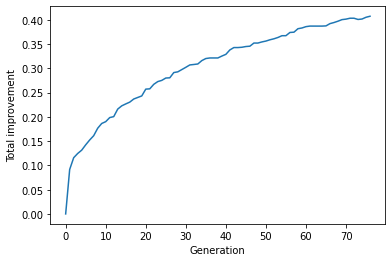

**************************************************************************************************** 
Generation 77/500
......................................................
Best MAE for teritory 0 is 26292.974247918344 . Average improvement is -0.0010361678956073428
.....................................................
Best MAE for teritory 1 is 21916.90990561597 . Average improvement is 0.0011560446542764335
.............................
Best MAE for teritory 2 is 25662.451182425135 . Average improvement is -0.001219243053842689
..........Finished evaluating teritory 0
Finished evaluating teritory 1
Finished evaluating teritory 2
..
Best MAE for teritory 3 is 20183.89484680647 . Average improvement is 0.0
Finished evaluating teritory 3
..
Best MAE for teritory 4 is 24198.44437961411 . Average improvement is 0.002235220133274707
Finished evaluating teritory 4
Need drift: 3
This generation took 0:10:44 to process.
Remaining 422 generations and approximately 67:13:17
Average improvemen

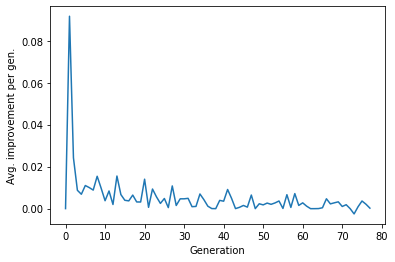

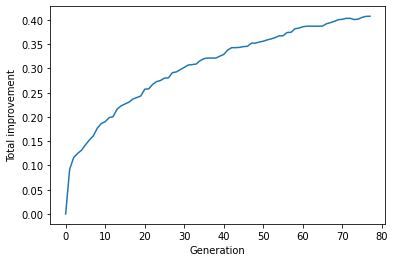

**************************************************************************************************** 
Generation 78/500
...............................................................................
Best MAE for teritory 0 is 25662.451182425135 . Average improvement is 0.006837824673151305
..........................
Best MAE for teritory 1 is 21916.90990561597 . Average improvement is 0.0050364773793003526
....................................
Best MAE for teritory 2 is 24989.10936596033 . Average improvement is 0.0038096296187839496
.....Finished evaluating teritory 0
Finished evaluating teritory 1
Finished evaluating teritory 2
..
Best MAE for teritory 3 is 20183.89484680647 . Average improvement is -0.004991070885454363
Finished evaluating teritory 3
..
Best MAE for teritory 4 is 24198.44437961411 . Average improvement is 0.009592686948410645
Finished evaluating teritory 4
Need drift: 1
This generation took 0:09:08 to process.
Remaining 421 generations and approximately 65:35:48
Ave

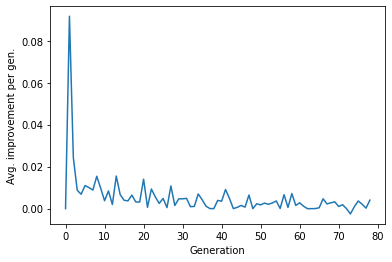

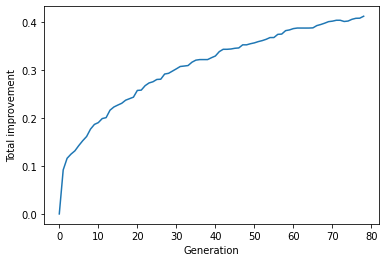

**************************************************************************************************** 
Generation 79/500
..........................................................................................................
Best MAE for teritory 0 is 25662.451182425135 . Average improvement is 0.0
....
Best MAE for teritory 1 is 21916.90990561597 . Average improvement is 0.0
....................................Finished evaluating teritory 0
Finished evaluating teritory 1
..
Best MAE for teritory 3 is 20183.89484680647 . Average improvement is 0.004639792699040024
Finished evaluating teritory 3
.
Best MAE for teritory 4 is 24198.44437961411 . Average improvement is 0.00011522852037226805
Finished evaluating teritory 4
.
Best MAE for teritory 2 is 24989.10936596033 . Average improvement is -1.0531456431372987e-06
Finished evaluating teritory 2
Need drift: 3
This generation took 0:10:56 to process.
Remaining 420 generations and approximately 71:01:35
Average improvement for generation:

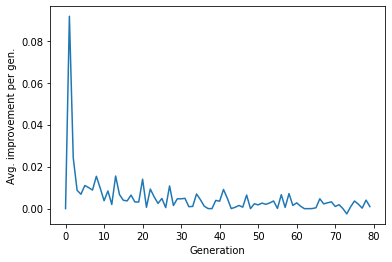

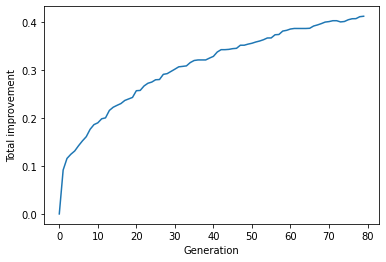

**************************************************************************************************** 
Generation 80/500
..............................................................................
Best MAE for teritory 1 is 21916.90990561597 . Average improvement is 0.006852950776061739
.........................
Best MAE for teritory 0 is 25662.451182425135 . Average improvement is 0.00360883860492045
...................................
Best MAE for teritory 2 is 26991.569957642394 . Average improvement is -0.016791551174890063
........
Best MAE for teritory 3 is 20183.89484680647 . Average improvement is 0.007179520439102527
Finished evaluating teritory 1
Finished evaluating teritory 0
Finished evaluating teritory 2
Finished evaluating teritory 3
....
Best MAE for teritory 4 is 24198.44437961411 . Average improvement is 0.0
Finished evaluating teritory 4
Need drift: 2
This generation took 0:14:21 to process.
Remaining 419 generations and approximately 85:33:54
Average improvement fo

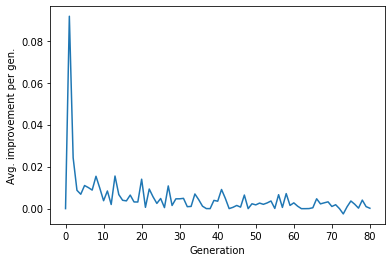

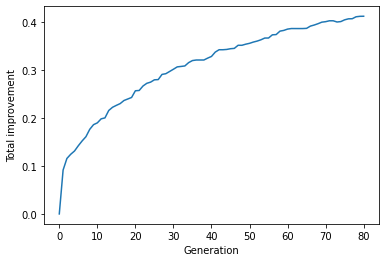

**************************************************************************************************** 
Generation 81/500
..............................................
Best MAE for teritory 0 is 25662.451182425135 . Average improvement is 0.0
.....................................
Best MAE for teritory 1 is 24311.24920163574 . Average improvement is -0.010678468592213886
...............................................................Finished evaluating teritory 0
Finished evaluating teritory 1
.
Best MAE for teritory 3 is 20183.89484680647 . Average improvement is 0.0015882197338012993
Finished evaluating teritory 3
..
Best MAE for teritory 2 is 21916.90990561597 . Average improvement is 0.013269880229044517
Finished evaluating teritory 2
.
Best MAE for teritory 4 is 24198.44437961411 . Average improvement is -0.0027173811631849842
Finished evaluating teritory 4
Need drift: 3
This generation took 0:04:28 to process.
Remaining 418 generations and approximately 58:15:24
Average improvement

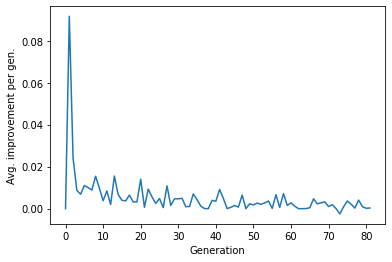

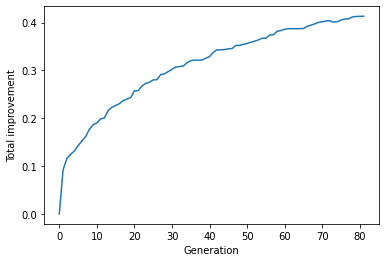

**************************************************************************************************** 
Generation 82/500
............................................................................
Best MAE for teritory 0 is 25662.451182425135 . Average improvement is -0.006238765566090709
..............................
Best MAE for teritory 2 is 21916.90990561597 . Average improvement is 0.006363962491163111
.......
Best MAE for teritory 1 is 24311.24920163574 . Average improvement is -0.0130434309450016
...........................
Best MAE for teritory 3 is 20183.89484680647 . Average improvement is 0.0
......Finished evaluating teritory 0
Finished evaluating teritory 2
Finished evaluating teritory 1
Finished evaluating teritory 3
....
Best MAE for teritory 4 is 24198.44437961411 . Average improvement is 0.010427005603077966
Finished evaluating teritory 4
Need drift: 3
This generation took 0:09:24 to process.
Remaining 417 generations and approximately 61:43:47
Average improvement for

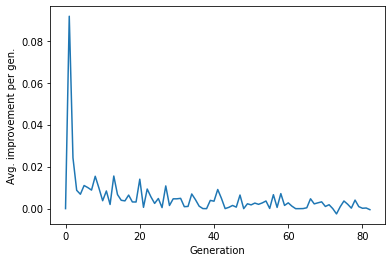

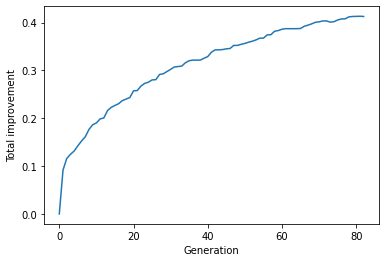

**************************************************************************************************** 
Generation 83/500
........................................................................................................
Best MAE for teritory 1 is 24311.24920163574 . Average improvement is 0.014897632641031722
.....
Best MAE for teritory 0 is 25662.451182425135 . Average improvement is 0.0019623387432428085
.....................................Finished evaluating teritory 1
Finished evaluating teritory 0
.
Best MAE for teritory 3 is 20183.89484680647 . Average improvement is -0.0031162287905802666
Finished evaluating teritory 3
..
Best MAE for teritory 4 is 24198.44437961411 . Average improvement is 0.003089236296276443
Finished evaluating teritory 4
.
Best MAE for teritory 2 is 21916.90990561597 . Average improvement is 0.0017856540899667817
Finished evaluating teritory 2
Need drift: 1
This generation took 0:07:44 to process.
Remaining 416 generations and approximately 57:36:45
Av

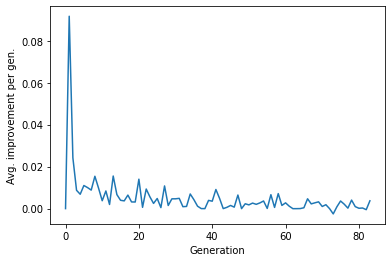

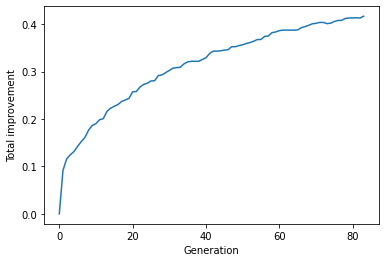

**************************************************************************************************** 
Generation 84/500
....................................................
Best MAE for teritory 0 is 25662.451182425135 . Average improvement is 0.0
.............................
Best MAE for teritory 1 is 24989.10936596033 . Average improvement is -0.008097101181000377
.................................................................
Best MAE for teritory 3 is 20183.89484680647 . Average improvement is 0.008258982836529816
Finished evaluating teritory 0
Finished evaluating teritory 1
Finished evaluating teritory 3
.
Best MAE for teritory 2 is 21916.90990561597 . Average improvement is 0.0
Finished evaluating teritory 2
...
Best MAE for teritory 4 is 24198.44437961411 . Average improvement is 0.0
Finished evaluating teritory 4
Need drift: 4
This generation took 0:09:26 to process.
Remaining 415 generations and approximately 61:22:31
Average improvement for generation: 3.237633110588778e-0

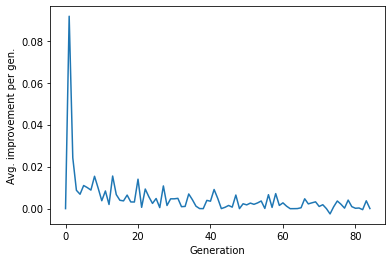

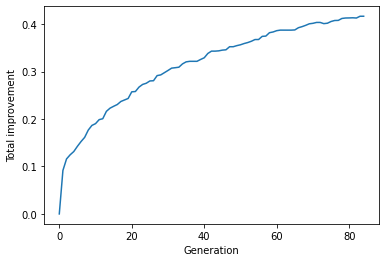

**************************************************************************************************** 
Generation 85/500
............................................................................
Best MAE for teritory 0 is 25662.451182425135 . Average improvement is -0.0015162878589299877
.........................
Best MAE for teritory 1 is 26341.268409448174 . Average improvement is -0.009701982925552799
.....................................
Best MAE for teritory 3 is 20183.89484680647 . Average improvement is -0.007697735242406911
........
Best MAE for teritory 2 is 21916.90990561597 . Average improvement is 0.009910639103403174
Finished evaluating teritory 0
Finished evaluating teritory 1
Finished evaluating teritory 3
Finished evaluating teritory 2
....
Best MAE for teritory 4 is 24198.44437961411 . Average improvement is 0.009242172835872253
Finished evaluating teritory 4
Need drift: 3
This generation took 0:06:55 to process.
Remaining 414 generations and approximately 54:30:54
A

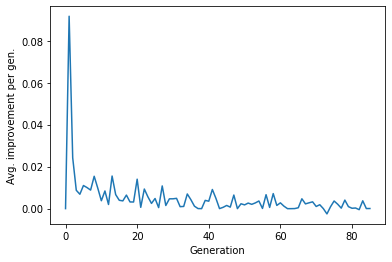

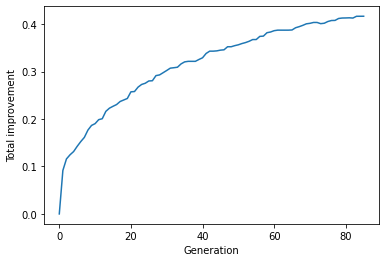

**************************************************************************************************** 
Generation 86/500
.....................................................................................................
Best MAE for teritory 0 is 25662.451182425135 . Average improvement is 0.00264982372892808
.
Best MAE for teritory 2 is 21916.90990561597 . Average improvement is 0.0
.......
Best MAE for teritory 1 .is 20183.89484680647 . Average improvement is 0.015211584303161718
....................................Finished evaluating teritory 0
Finished evaluating teritory 2
Finished evaluating teritory 1
...
Best MAE for teritory 3 is 24311.24920163574 . Average improvement is -0.010437388090489663
Finished evaluating teritory 3
.
Best MAE for teritory 4 is 24198.44437961411 . Average improvement is -0.007403320398804092
Finished evaluating teritory 4
Need drift: 3
This generation took 0:05:39 to process.
Remaining 413 generations and approximately 46:38:54
Average improvement fo

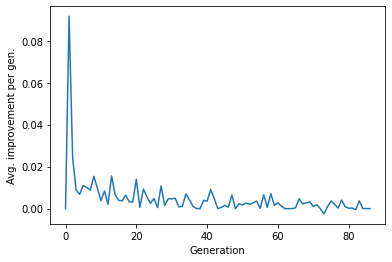

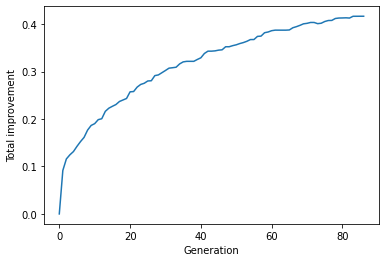

**************************************************************************************************** 
Generation 87/500
..................................................
Best MAE for teritory 0 is 25662.451182425135 . Average improvement is -0.0012339686219233759
.........................
Best MAE for teritory 1 is 20183.89484680647 . Average improvement is 0.0
.............................................................
Best MAE for teritory 2 is 21916.90990561597 . Average improvement is -0.005326221604261661
..........Finished evaluating teritory 0
Finished evaluating teritory 1
Finished evaluating teritory 2
...
Best MAE for teritory 4 is 24198.44437961411 . Average improvement is 0.0012473504563095261
Finished evaluating teritory 4
.
Best MAE for teritory 3 is 24311.24920163574 . Average improvement is 0.005329965320290286
Finished evaluating teritory 3
Need drift: 3
This generation took 0:06:51 to process.
Remaining 412 generations and approximately 46:50:08
Average improvement

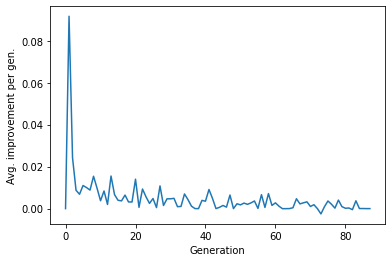

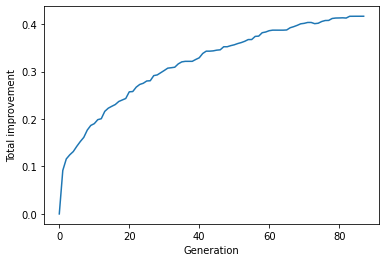

**************************************************************************************************** 
Generation 88/500
..........................................................................
Best MAE for teritory 1 is 20183.89484680647 . Average improvement is -0.004214510125265081
...........................
Best MAE for teritory 0 is 25662.451182425135 . Average improvement is 0.005994845122317738
.........
Best MAE for teritory 2 is 21916.90990561597 . Average improvement is 0.005038609320968002
....................................Finished evaluating teritory 1
Finished evaluating teritory 0
Finished evaluating teritory 2
..
Best MAE for teritory 4 is 24198.44437961411 . Average improvement is 0.0008824535564986302
Finished evaluating teritory 4
..
Best MAE for teritory 3 is 24311.24920163574 . Average improvement is -0.0025730763618186936
Finished evaluating teritory 3
Need drift: 2
This generation took 0:08:08 to process.
Remaining 411 generations and approximately 51:16:09
Av

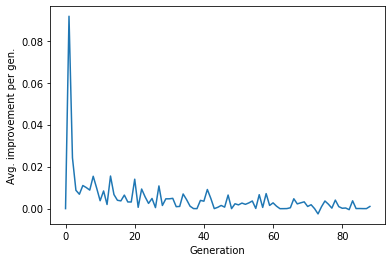

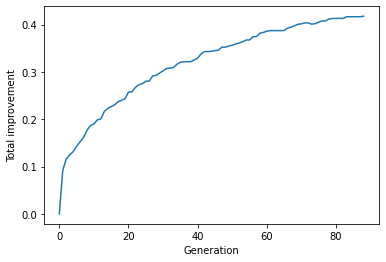

**************************************************************************************************** 
Generation 89/500
...............................................................................
Best MAE for teritory 1 is 20183.89484680647 . Average improvement is -0.0023422592025860167
..........................
Best MAE for teritory 0 is 25662.451182425135 . Average improvement is 0.005504911734198981
........
Best MAE for teritory 2 is 21916.90990561597 . Average improvement is 0.0026168734447806763
.................................Finished evaluating teritory 1
Finished evaluating teritory 0
Finished evaluating teritory 2
..
Best MAE for teritory 3 is 24311.24920163574 . Average improvement is -0.00792455080622445
Finished evaluating teritory 3
..
Best MAE for teritory 4 is 24198.44437961411 . Average improvement is 0.0
Finished evaluating teritory 4
Need drift: 3
This generation took 0:06:56 to process.
Remaining 410 generations and approximately 49:18:12
Average improvement 

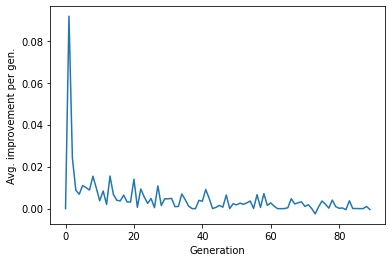

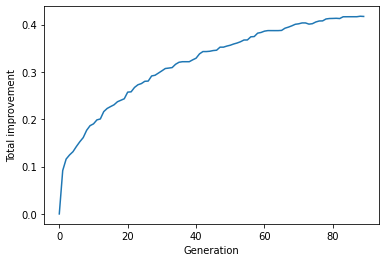

**************************************************************************************************** 
Generation 90/500
.............................................
Best MAE for teritory 0 is 25662.451182425135 . Average improvement is 0.0
................................................................
Best MAE for teritory 2 is 21916.90990561597 . Average improvement is 0.0
.....................................Finished evaluating teritory 0
Finished evaluating teritory 2
.
Best MAE for teritory 3 is 24311.24920163574 . Average improvement is 0.0011090732737331077
Finished evaluating teritory 3
..
Best MAE for teritory 4 is 24198.44437961411 . Average improvement is -0.00113237328336524
Finished evaluating teritory 4
.
Best MAE for teritory 1 is 20183.89484680647 . Average improvement is 1.4107403488727854e-05
Finished evaluating teritory 1
Need drift: 3
This generation took 0:06:20 to process.
Remaining 409 generations and approximately 46:13:09
Average improvement for generation: -

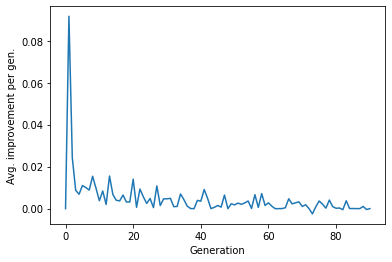

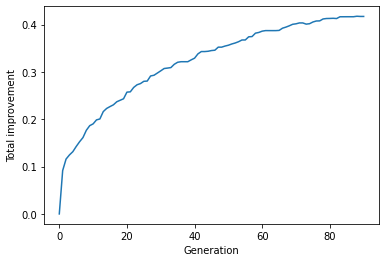

**************************************************************************************************** 
Generation 91/500
....................................................
Best MAE for teritory 0 is 25662.451182425135 . Average improvement is 0.00150099721637309
........................................................................................
Best MAE for teritory 3 is 24311.24920163574 . Average improvement is 0.006407734833080214
....
Best MAE for teritory 1 is 20183.89484680647 . Average improvement is -0.0014849342951626099
..Finished evaluating teritory 0
Finished evaluating teritory 3
Finished evaluating teritory 1
..
Best MAE for teritory 2 is 21916.90990561597 . Average improvement is -0.006956112171909279
Finished evaluating teritory 2
..
Best MAE for teritory 4 is 24198.44437961411 . Average improvement is 0.0069962900698286035
Finished evaluating teritory 4
Need drift: 2
This generation took 0:11:12 to process.
Remaining 408 generations and approximately 61:08:40
Ave

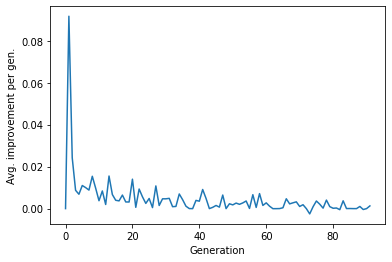

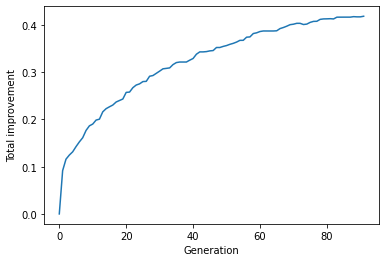

**************************************************************************************************** 
Generation 92/500
................................................................................................................
Best MAE for teritory 2 is 21916.90990561597 . Average improvement is 0.01886922104263644
..
Best MAE for teritory 0 is 25662.451182425135 . Average improvement is 0.0
..................
Best MAE for teritory 1 is 20183.89484680647 . Average improvement is -0.000810741849586849
.......
Best MAE for teritory 3 is 24311.24920163574 . Average improvement is -0.0029481180132971962
.......Finished evaluating teritory 2
Finished evaluating teritory 0
Finished evaluating teritory 1
Finished evaluating teritory 3
....
Best MAE for teritory 4 is 24198.44437961411 . Average improvement is 0.0008245886851081519
Finished evaluating teritory 4
Need drift: 3
This generation took 0:08:44 to process.
Remaining 407 generations and approximately 60:08:50
Average improvement 

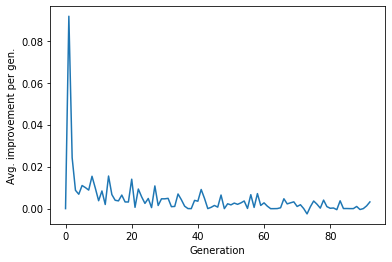

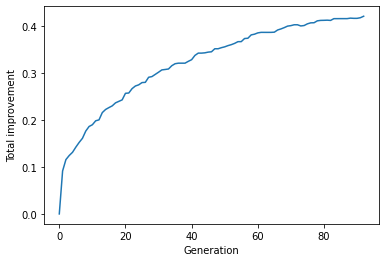

**************************************************************************************************** 
Generation 93/500
...............................................................................
Best MAE for teritory 0 is 25662.451182425135 . Average improvement is -0.0027667640956045014
......................................................
Best MAE for teritory 3 is 26447.791706166754 . Average improvement is -0.009214398204140939
...
Best MAE for teritory 2 is 21916.90990561597 . Average improvement is -0.0003045438413556978
..........Finished evaluating teritory 0
Finished evaluating teritory 3
Finished evaluating teritory 2
...
Best MAE for teritory 4 is 24198.44437961411 . Average improvement is 0.0
Finished evaluating teritory 4
.
Best MAE for teritory 1 is 20183.89484680647 . Average improvement is 0.012450763282701782
Finished evaluating teritory 1
Need drift: 4
This generation took 0:10:05 to process.
Remaining 406 generations and approximately 64:08:58
Average improveme

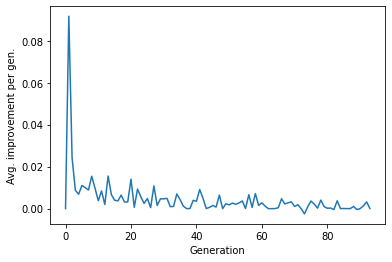

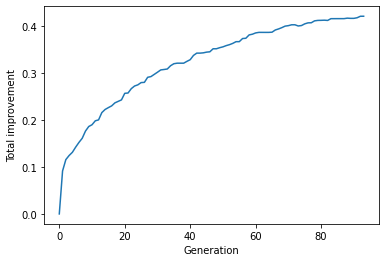

**************************************************************************************************** 
Generation 94/500
......................................................
Best MAE for teritory 0 is 25662.451182425135 . Average improvement is 0.0008894657810198936
....................................................
Best MAE for teritory 1 is 20183.89484680647 . Average improvement is -0.00030369649997674664
..................................
Best MAE for teritory 3 is 26447.791706166754 . Average improvement is -0.003757910508366047
...
Best MAE for teritory 2 is 21916.90990561597 . Average improvement is 0.00030889698077674055
Finished evaluating teritoryFinished evaluating teritory...Finished evaluating teritory 3
 2
Finished evaluating teritory  1
0
....
Best MAE for teritory 4 is 24198.44437961411 . Average improvement is 0.002968015515462774
Finished evaluating teritory 4
Need drift: 2
This generation took 0:03:49 to process.
Remaining 405 generations and approximately 44:54:5

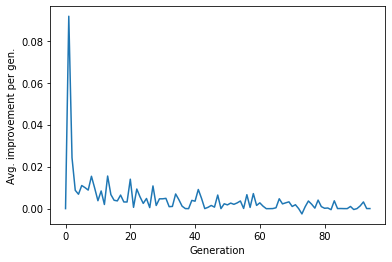

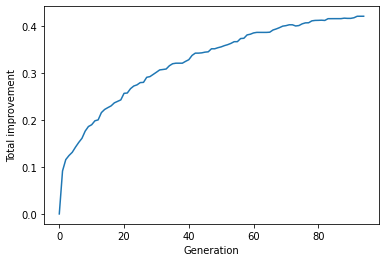

**************************************************************************************************** 
Generation 95/500
...........................................................................
Best MAE for teritory 0 is 25662.451182425135 . Average improvement is 0.0
...........................
Best MAE for teritory 1 is 20183.89484680647 . Average improvement is 0.005522834124919607
..
Best MAE for teritory 2 is 21916.90990561597 . Average improvement is -0.006216607718220857
........................................
Best MAE for teritory 3 is 26447.791706166754 . Average improvement is 0.0006446304098182143
..Finished evaluating teritory 0
Finished evaluating teritory 1
Finished evaluating teritory 2
Finished evaluating teritory 3
....
Best MAE for teritory 4 is 24198.44437961411 . Average improvement is 0.0
Finished evaluating teritory 4
Need drift: 3
This generation took 0:06:11 to process.
Remaining 404 generations and approximately 43:16:16
Average improvement for generation: -

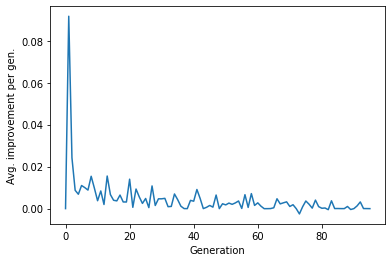

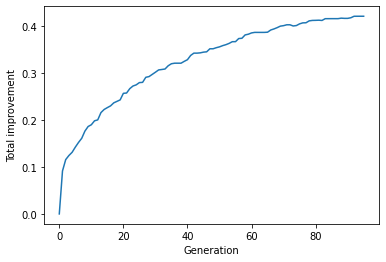

**************************************************************************************************** 
Generation 96/500
..........................................................................
Best MAE for teritory 0 is 25662.451182425135 . Average improvement is -0.0034298997480195492
.......
Best MAE for teritory 1 is 20183.89484680647 . Average improvement is 0.0
........................................................
Best MAE for teritory 2 is 21916.90990561597 . Average improvement is -0.0005840380739351447
.........Finished evaluating teritory 0
Finished evaluating teritory 1
Finished evaluating teritory 2
..
Best MAE for teritory 3 is 26447.791706166754 . Average improvement is 0.007886368309404812
Finished evaluating teritory 3
..
Best MAE for teritory 4 is 24198.44437961411 . Average improvement is -0.0009036254991181547
Finished evaluating teritory 4
Need drift: 4
This generation took 0:08:16 to process.
Remaining 403 generations and approximately 49:20:44
Average improvem

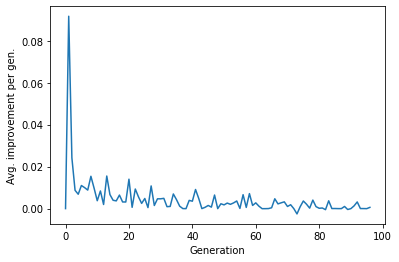

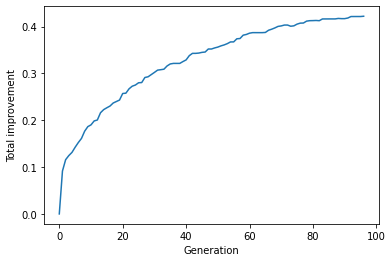

**************************************************************************************************** 
Generation 97/500
..................................................
Best MAE for teritory 0 is 25662.451182425135 . Average improvement is 0.0022482345753866984
....................................................................................
Best MAE for teritory 2 is 20183.89484680647 . Average improvement is 0.016922415443900052
...
Best MAE for teritory 3 is 26918.12270547945 . Average improvement is -0.002969199589724636
.........Finished evaluating teritory 0
Finished evaluating teritory 2
Finished evaluating teritory 3
.
Best MAE for teritory 1 is 22664.607172251206 . Average improvement is -0.018484232370504783
Finished evaluating teritory 1
...
Best MAE for teritory 4 is 24198.44437961411 . Average improvement is 0.003044744892922724
Finished evaluating teritory 4
Need drift: 2
This generation took 0:06:05 to process.
Remaining 402 generations and approximately 45:01:29
Av

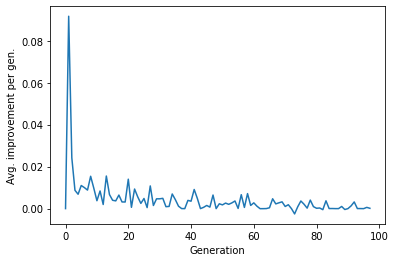

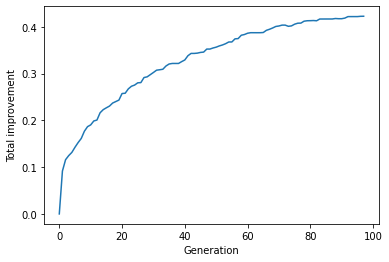

**************************************************************************************************** 
Generation 98/500
............................................................................................................
Best MAE for teritory 2 is 20183.89484680647 . Average improvement is 0.0
................................
Best MAE for teritory 3 is 26918.12270547945 . Average improvement is -0.0015234814276132713
......Finished evaluating teritory 2
Finished evaluating teritory 3
..
Best MAE for teritory 1 is 22664.607172251206 . Average improvement is 0.003322080826582363
Finished evaluating teritory 1
.
Best MAE for teritory 0 is 25053.19160879507 . Average improvement is 0.009201980924437247
Finished evaluating teritory 0
.
Best MAE for teritory 4 is 24198.44437961411 . Average improvement is 0.0
Finished evaluating teritory 4
Need drift: 3
This generation took 0:10:26 to process.
Remaining 401 generations and approximately 57:22:00
Average improvement for generation: 0.

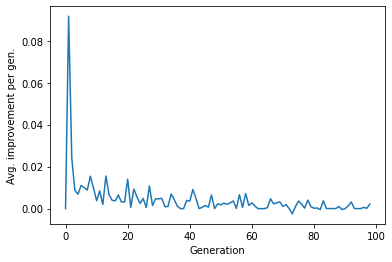

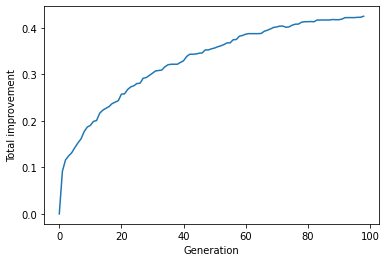

**************************************************************************************************** 
Generation 99/500
.......................................................
Best MAE for teritory 0 is 25053.19160879507 . Average improvement is -0.0011264988574675172
.............................
Best MAE for teritory ................1 is 22664.607172251206 . Average improvement is 0.0
...................................
Best MAE for teritory 2 is 20183.89484680647 . Average improvement is 0.007841587351287815
...........Finished evaluating teritory 0
Finished evaluating teritory 1
Finished evaluating teritory 2
...
Best MAE for teritory 4 is 24198.44437961411 . Average improvement is -0.005902220560815463
Finished evaluating teritory 4
.
Best MAE for teritory 3 is 26918.12270547945 . Average improvement is -0.0007941161874782665
Finished evaluating teritory 3
Need drift: 4
This generation took 0:08:36 to process.
Remaining 400 generations and approximately 57:18:58
Average improvemen

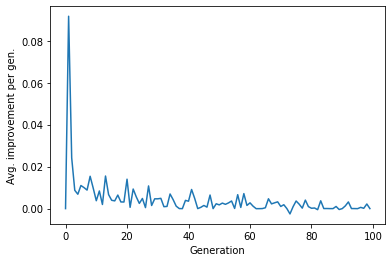

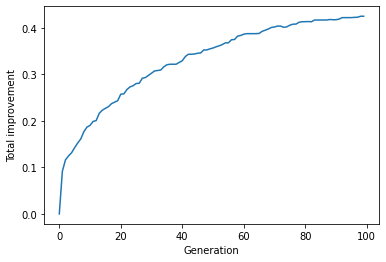

**************************************************************************************************** 
Generation 100/500
..............................................................................
Best MAE for teritory 0 is 25053.19160879507 . Average improvement is 0.0027782283569199873
.......................
Best MAE for teritory 1 is 22664.607172251206 . Average improvement is 0.002986133349310416
...........
Best MAE for teritory 2 is 20183.89484680647 . Average improvement is 0.001095109086154622
..................................Finished evaluating teritory 0
Finished evaluating teritory 1
Finished evaluating teritory 2
...
Best MAE for teritory 4 is 24198.44437961411 . Average improvement is -0.022425189446408922
Finished evaluating teritory 4
.
Best MAE for teritory 3 is 26918.12270547945 . Average improvement is 0.0003061549509442152
Finished evaluating teritory 3
Need drift: 1
This generation took 0:05:58 to process.
Remaining 399 generations and approximately 48:28:38
Av

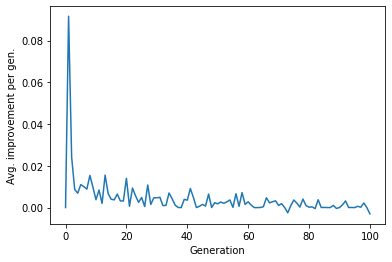

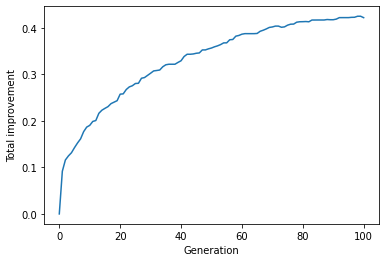

**************************************************************************************************** 
Generation 101/500
.................................................................
Best MAE for teritory .0 is 25053.19160879507 . Average improvement is 0.0029627417282396262
................
Best MAE for teritory 1 is 22664.607172251206 . Average improvement is 0.009634464616034899
.....................................................
Best MAE for teritory 2 is 20183.89484680647 . Average improvement is -0.003544589170014545
...........Finished evaluating teritory 0
Finished evaluating teritory 1
Finished evaluating teritory 2
...
Best MAE for teritory 3 is 26918.12270547945 . Average improvement is 0.0
Finished evaluating teritory 3
.
Best MAE for teritory 4 is 24198.44437961411 . Average improvement is 0.030876608498095592
Finished evaluating teritory 4
Need drift: 2
This generation took 0:07:48 to process.
Remaining 398 generations and approximately 50:06:11
Average improvement 

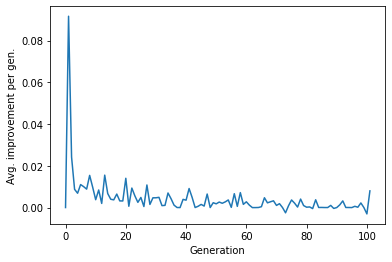

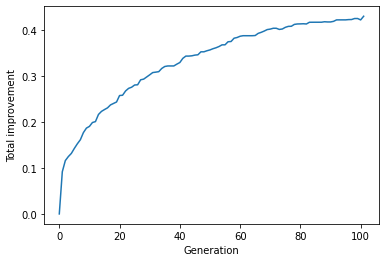

**************************************************************************************************** 
Generation 102/500
......................................................
Best MAE for teritory 0 is 25053.19160879507 . Average improvement is 0.0004132923550568268
...................................................
Best MAE for teritory 1 is 22664.607172251206 . Average improvement is 0.0
.....................................
Best MAE for teritory 2 is 20183.89484680647 . Average improvement is 0.00024591325139855513
....Finished evaluating teritory 0
Finished evaluating teritory 1
Finished evaluating teritory 2
...
Best MAE for teritory 3 is 26918.12270547945 . Average improvement is -0.00040180746751394825
Finished evaluating teritory 3
.
Best MAE for teritory 4 is 24198.44437961411 . Average improvement is -0.00024080123169667456
Finished evaluating teritory 4
Need drift: 3
This generation took 0:11:11 to process.
Remaining 397 generations and approximately 62:00:37
Average impro

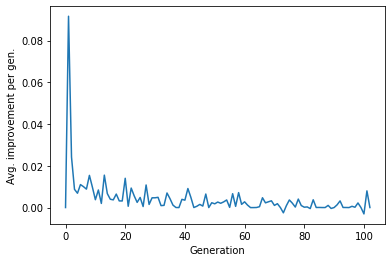

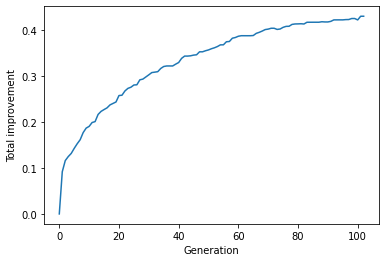

**************************************************************************************************** 
Generation 103/500
........................................................
Best MAE for teritory.............. 0 is 25053.19160879507 . Average improvement is 0.0
........................................
Best MAE for teritory 1 is 24554.957587916582 . Average improvement is -0.004550216524720763
..
Best MAE for teritory 2 is 20183.89484680647 . Average improvement is 0.002882374986406866
..................................Finished evaluating teritory 0
Finished evaluating teritory 1
Finished evaluating teritory 2
..
Best MAE for teritory 3 is 26763.654801905253 . Average improvement is 0.003912032052572512
Finished evaluating teritory 3
..
Best MAE for teritory 4 is 22664.607172251206 . Average improvement is 0.005143070977429165
Finished evaluating teritory 4
Need drift: 2
This generation took 0:11:17 to process.
Remaining 396 generations and approximately 68:11:03
Average improvement

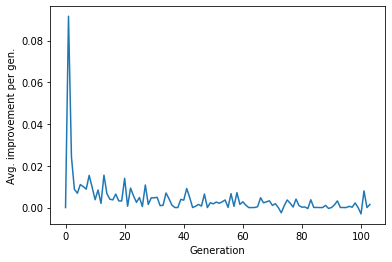

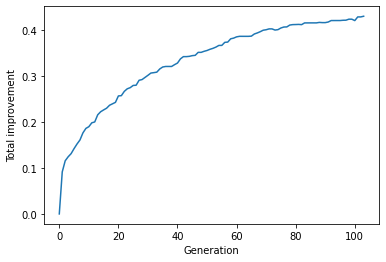

**************************************************************************************************** 
Generation 104/500
..............................................................................
Best MAE for teritory 1 is 24311.24920163574 . Average improvement is 0.006381347469229803
...................................
Best MAE for teritory 0 is 25053.19160879507 . Average improvement is -0.003368875655302306
.......................
Best MAE for teritory 2 is 20183.89484680647 . Average improvement is -0.006538450175632038
..........Finished evaluating teritory 1
Finished evaluating teritory 0
Finished evaluating teritory 2
...
Best MAE for teritory 3 is 26763.654801905253 . Average improvement is 0.0
Finished evaluating teritory 3
.
Best MAE for teritory 4 is 22664.607172251206 . Average improvement is 0.0034124004583380163
Finished evaluating teritory 4
Need drift: 3
This generation took 0:06:03 to process.
Remaining 395 generations and approximately 53:57:24
Average improvemen

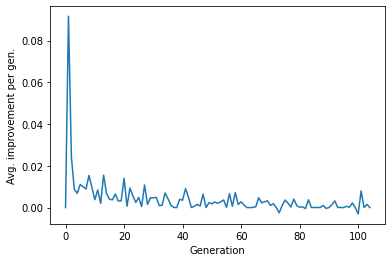

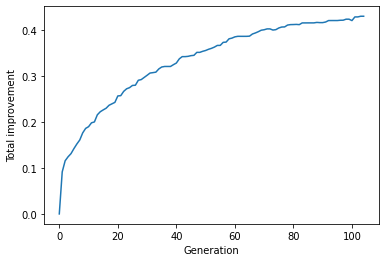

**************************************************************************************************** 
Generation 105/500
..................................................................................
Best MAE for teritory 1 is 24311.24920163574 . Average improvement is 0.0
...........................
Best MAE for teritory 0 is 25053.19160879507 . Average improvement is 0.006255843879595213
..........................
Best MAE for teritory 4 is 22664.607172251206 . Average improvement is 0.001512786754337414
...........Finished evaluating teritory 1
Finished evaluating teritory 0
Finished evaluating teritory 4
...
Best MAE for teritory 2 is 20183.89484680647 . Average improvement is 0.001167933068087157
Finished evaluating teritory 2
.
Best MAE for teritory 3 is 26763.654801905253 . Average improvement is -0.0005724923569579987
Finished evaluating teritory 3
Need drift: 2
This generation took 0:04:57 to process.
Remaining 394 generations and approximately 43:11:38
Average improvement

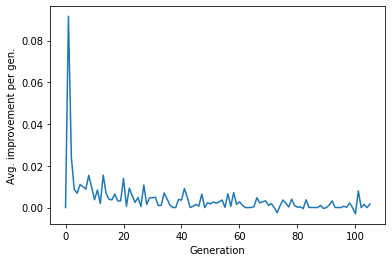

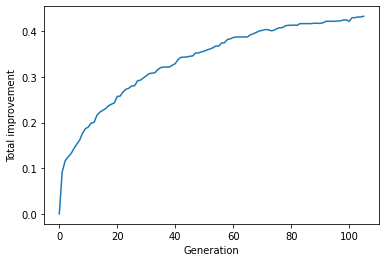

**************************************************************************************************** 
Generation 106/500
..................................................
Best MAE for teritory 0 is 25053.19160879507 . Average improvement is 0.0
.....................................................................................
Best MAE for teritory 2 is 20183.89484680647 . Average improvement is -0.017324000439735143
......
Best MAE for teritory 3 is 21916.90990561597 . Average improvement is 0.0157858762826093
..
Best MAE for teritory 1 is 24311.24920163574 . Average improvement is 0.0014384768474888787
...Finished evaluating teritory 0
Finished evaluating teritory 2
Finished evaluating teritory 3
Finished evaluating teritory 1
....
Best MAE for teritory 4 is 22664.607172251206 . Average improvement is 0.0
Finished evaluating teritory 4
Need drift: 3
This generation took 0:09:15 to process.
Remaining 393 generations and approximately 51:53:23
Average improvement for generation: -1.

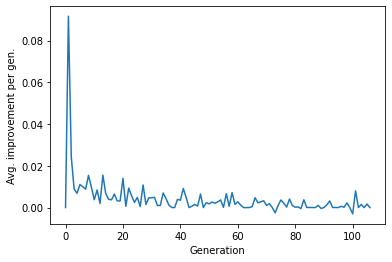

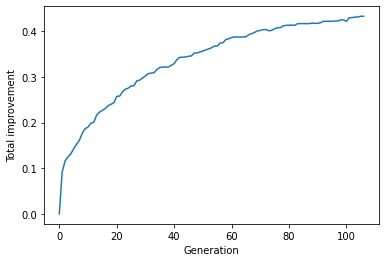

**************************************************************************************************** 
Generation 107/500
....................................................
Best MAE for teritory 0 is 25053.19160879507 . Average improvement is -0.0018091023313860921
..............................................................
Best MAE for teritory 2 is 20183.89484680647 . Average improvement is 0.019430946642442493
.........................
Best MAE for teritory 3 is 21916.90990561597 . Average improvement is 0.0
.......Finished evaluating teritory 0
Finished evaluating teritory 2
Finished evaluating teritory 3
...
Best MAE for teritory 1 is 24311.24920163574 . Average improvement is -0.0069885573976006254
Finished evaluating teritory 1
.
Best MAE for teritory 4 is 22664.607172251206 . Average improvement is -0.008394197490527056
Finished evaluating teritory 4
Need drift: 4
This generation took 0:07:40 to process.
Remaining 392 generations and approximately 50:55:47
Average improveme

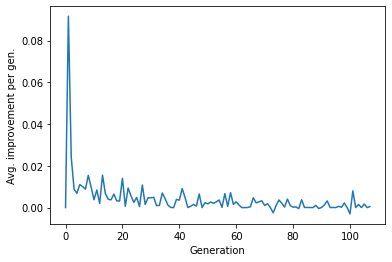

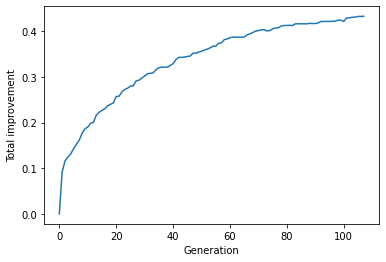

**************************************************************************************************** 
Generation 108/500
.................................................................................
Best MAE for teritory 1 is 24311.24920163574 . Average improvement is -0.003411914024545326
.
Best MAE for teritory 0 is 25053.19160879507 . Average improvement is 0.0008922970390070617
...............................................
Best MAE for teritory 3 is 21916.90990561597 . Average improvement is 0.0013488358722557603
.................Finished evaluating teritory 1
Finished evaluating teritory 0
Finished evaluating teritory 3
...
Best MAE for teritory 2 is 20183.89484680647 . Average improvement is 0.0
Finished evaluating teritory 2
.
Best MAE for teritory 4 is 22664.607172251206 . Average improvement is 0.0014180077633969557
Finished evaluating teritory 4
Need drift: 2
This generation took 0:05:55 to process.
Remaining 391 generations and approximately 44:43:00
Average improvemen

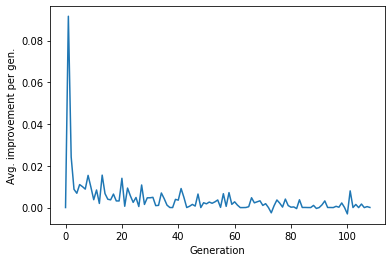

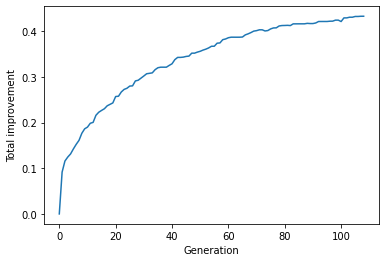

**************************************************************************************************** 
Generation 109/500
.............................................................................................
Best MAE for teritory 0 ...is ....25053.19160879507 . Average improvement is 0.0
.....
Best MAE for teritory 1 is 24311.24920163574 . Average improvement is 0.004842913353665157
...
Best MAE for teritory 2 is 20183.89484680647 . Average improvement is -0.0020762838708304754
......................................Finished evaluating teritory 0
Finished evaluating teritory 1
Finished evaluating teritory 2
...
Best MAE for teritory 3 is 21916.90990561597 . Average improvement is -0.004831058591311943
Finished evaluating teritory 3
.
Best MAE for teritory 4 is 22664.607172251206 . Average improvement is 0.0020492614808926835
Finished evaluating teritory 4
Need drift: 3
This generation took 0:05:28 to process.
Remaining 390 generations and approximately 40:05:34
Average improvemen

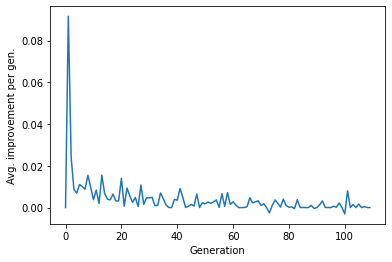

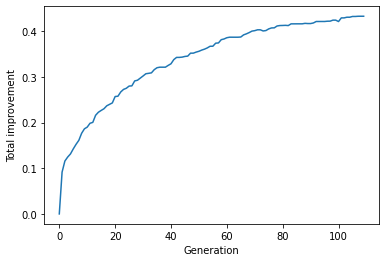

**************************************************************************************************** 
Generation 110/500
......................................................................
Best MAE for teritory 0 is 25053.19160879507 . Average improvement is -0.0018903069100366654
..................................
Best MAE for teritory 2 is 20183.89484680647 . Average improvement is 0.0019303969553323697
...........................

In [ ]:
# Hyper parameter tuning (using a genetic algorithm)

n_features = X_train_prepped.shape[1]
n_samples = X_train_prepped.shape[0]
pop_size = 30
n_generations = 500
n_territories = 5
n_survivors = 15
drift_threshold = 0.0
small_step_mutation_rate = 0.1
large_step_mutation_rate = 0.01

param_limits = {
    'n_estimators':             (1, 1000),
    'max_depth':                (1, n_features),
    'min_samples_split':        (2, 1000),
    'min_samples_leaf':         (1, 1000),
    'min_weight_fraction_leaf': (0, 0.5),
    'max_features':             (1, n_features),
    'max_leaf_nodes':           (2, 10000),
    'min_impurity_decrease':    (0, 1),
    'bootstrap':                (True, False),
    'oob_score':                (True, False),
    'ccp_alpha':                (0, 1),
    'max_samples':              (1, n_samples),
}

"""
Format of ecosystem is:
{
  'last_generation': int,
  'times': [float,...],
  'improvements': [float,...],
  'average_total_improve': [float,...],
  'runtime_running_avg': float,
  'total_runtime': float,
  'avg_mae_survivors': [{
    'generation': int,
    'values': [None] * n_territories,
  }],
  'teritories': [
    [{hp:{}, mae=None},...],
    .
    .
    .
  ]
}
"""
ecosystem = {
    'last_generation': 0,
    'times': [],
    'improvements': [],
    'average_total_improve': [],
    'runtime_running_avg': 0,
    'total_runtime': 0,
    'avg_mae_survivors': [],
    'teritories': []
}


def init_env(ecosystem):
  teritories = []
  for i in range(n_territories):
    teritories.append([])
  ecosystem['teritories'] = teritories


def init_HP():
  """
  Provides a randomly initialized set of hyper parameters for a RandomForestRegressor
  """

  global n_features, n_samples, param_limits

  HP = {
      'n_estimators': int(random.randint(*param_limits['n_estimators'])),
      'max_depth': int(random.randint(*param_limits['max_depth'])),
      'min_samples_split': int(random.randint(*param_limits['min_samples_split'])),
      'min_samples_leaf': int(random.randint(*param_limits['min_samples_leaf'])),
      'min_weight_fraction_leaf': random.uniform(*param_limits['min_weight_fraction_leaf']),
      'max_features': int(random.randint(*param_limits['max_features'])),
      'max_leaf_nodes': int(random.randint(*param_limits['max_leaf_nodes'])),
      'min_impurity_decrease': random.uniform(*param_limits['min_impurity_decrease']),
      'bootstrap': bool(random.choice((True, False))),
      'oob_score': False,
      'ccp_alpha': random.uniform(*param_limits['ccp_alpha']),
      'max_samples': int(random.randint(*param_limits['max_samples'])),
  }

  if HP['bootstrap'] == True:
    HP['oob_score'] = bool(random.choice((True, False)))
  
  return HP


def evaluate_model(model, X_train, X_cv, y_train, y_cv):
  model.fit(X_train_prepped, y_train)
  pred = model.predict(X_cv_prepped)
  return mean_absolute_error(pred, y_cv)


def ragnge_size(limits):
  return limits[1] - limits[0]


def small_step_mutation(zygote):
  zygote['n_estimators'] = max(1, zygote['n_estimators'] + int(np.random.normal(0, ragnge_size(param_limits['n_estimators']) * small_step_mutation_rate)))
  zygote['max_depth'] = min(max(1, zygote['max_depth'] + int(np.random.normal(0, int(ragnge_size(param_limits['max_depth']) * small_step_mutation_rate)))), n_features)
  zygote['min_samples_split'] = max(2, zygote['min_samples_split'] + int(np.random.normal(0, ragnge_size(param_limits['min_samples_split']) * small_step_mutation_rate)))
  zygote['min_samples_leaf'] = max(1, zygote['min_samples_leaf'] + int(np.random.normal(0, ragnge_size(param_limits['min_samples_leaf']) * small_step_mutation_rate)))
  zygote['min_weight_fraction_leaf'] = min(max(0, zygote['min_weight_fraction_leaf'] + np.random.normal(0, ragnge_size(param_limits['min_weight_fraction_leaf']) * small_step_mutation_rate)), 0.5)
  zygote['max_features'] = min(max(1, zygote['max_features'] + int(np.random.normal(0, int(ragnge_size(param_limits['max_features']) * small_step_mutation_rate)))), n_features)
  zygote['max_leaf_nodes'] = max(2, zygote['max_leaf_nodes'] + int(np.random.normal(0, ragnge_size(param_limits['max_leaf_nodes']) * small_step_mutation_rate)))
  zygote['min_impurity_decrease'] += max(0, np.random.normal(0, ragnge_size(param_limits['min_impurity_decrease']) * small_step_mutation_rate))
  zygote['bootstrap'] = bool(np.random.choice([True, False], p=[1 - small_step_mutation_rate if x==zygote['bootstrap'] else small_step_mutation_rate for x in [True, False]]))
  zygote['oob_score'] = bool(np.random.choice([True, False], p=[1 - small_step_mutation_rate if x==zygote['oob_score'] else small_step_mutation_rate for x in [True, False]]))
  zygote['ccp_alpha'] = max(0, zygote['ccp_alpha'] + int(np.random.normal(0, ragnge_size(param_limits['ccp_alpha']) * small_step_mutation_rate)))
  zygote['max_samples'] = min(max(1, zygote['max_samples'] + int(np.random.normal(0, ragnge_size(param_limits['max_samples']) * small_step_mutation_rate))), n_samples)

  if zygote['bootstrap'] == False:
    zygote['oob_score'] = False
  
  return zygote


def should_do_large_step():
  return np.random.choice([True, False], p=[1 - large_step_mutation_rate, large_step_mutation_rate])


def large_step_mutation(zygote):
  global param_limits

  if should_do_large_step():
    zygote['n_estimators'] = int(random.randint(*param_limits['n_estimators']))
  if should_do_large_step():
    zygote['max_depth'] = int(random.randint(*param_limits['max_depth']))
  if should_do_large_step():
    zygote['min_samples_split'] = int(random.randint(*param_limits['min_samples_split']))
  if should_do_large_step():
    zygote['min_samples_leaf'] = int(random.randint(*param_limits['min_samples_leaf']))
  if should_do_large_step():
    zygote['min_weight_fraction_leaf'] = random.uniform(*param_limits['min_weight_fraction_leaf'])
  if should_do_large_step():
    zygote['max_features'] = int(random.randint(*param_limits['max_features']))
  if should_do_large_step():
    zygote['max_leaf_nodes'] = int(random.randint(*param_limits['max_leaf_nodes']))
  if should_do_large_step():
    zygote['min_impurity_decrease'] = random.uniform(*param_limits['min_impurity_decrease'])
  if should_do_large_step():
    zygote['bootstrap'] = bool(random.choice((True, False)))
  if should_do_large_step():
    zygote['oob_score'] = bool(random.choice((True, False)))
  if should_do_large_step():
    zygote['ccp_alpha'] = random.uniform(*param_limits['ccp_alpha'])
  if should_do_large_step():
    zygote['max_samples'] = int(random.randint(*param_limits['max_samples']))

  if zygote['bootstrap'] == False:
    zygote['oob_score'] = False
  
  return zygote


def mutate(zygote):
  zygote = small_step_mutation(zygote)
  zygote = large_step_mutation(zygote)
  return zygote


def fertilize(male, female):
  parents = [male, female]

  return mutate({
      'n_estimators': random.choice(parents)['hp']['n_estimators'],
      'max_depth': random.choice(parents)['hp']['max_depth'],
      'min_samples_split': random.choice(parents)['hp']['min_samples_split'],
      'min_samples_leaf': random.choice(parents)['hp']['min_samples_leaf'],
      'min_weight_fraction_leaf': random.choice(parents)['hp']['min_weight_fraction_leaf'],
      'max_features': random.choice(parents)['hp']['max_features'],
      'max_leaf_nodes': random.choice(parents)['hp']['max_leaf_nodes'],
      'min_impurity_decrease': random.choice(parents)['hp']['min_impurity_decrease'],
      'bootstrap': random.choice(parents)['hp']['bootstrap'],
      'oob_score': random.choice(parents)['hp']['oob_score'],
      'ccp_alpha': random.choice(parents)['hp']['ccp_alpha'],
      'max_samples': random.choice(parents)['hp']['max_samples'],
  })


def breed(population):
  alpha_male = population[0]
  female = random_gen.choice(population[1:n_survivors])
  return {'hp': fertilize(alpha_male, female), 'mae': None}


def perform_drift(teritories, idx):
  teritory_1 = teritories[idx]
  teritory_2 = random.choice([x for x in teritories if x is not teritory_1])
  specimen_1 = random_gen.choice(teritory_1[:n_survivors])
  specimen_2 = random_gen.choice(teritory_2[:n_survivors])
  teritory_1.remove(specimen_1)
  teritory_2.remove(specimen_2)
  teritory_1.append(specimen_2)
  teritory_2.append(specimen_1)


class Survivor:
  def __init__(self, hp, mae):
    self.hp = hp
    self.mae = mae
  
  def __lt__(self, other):
    return self.mae < other.mae
  
  def to_dict(self):
    return {'hp': self.hp, 'mae': self.mae}


def seconds2timestr(seconds): 
  hour = seconds // 3600
  seconds %= 3600
  minutes = seconds // 60
  seconds %= 60
  
  return "%d:%02d:%02d" % (hour, minutes, seconds)


def process_specimen(population, idx):
  global preped_X_train, preped_X_cv, y_train, y_cv
  if population[idx]['mae'] is None:
    model = model_from_hp(population[idx]['hp'])
    population[idx]['mae'] = evaluate_model(model, X_train_prepped, X_cv_prepped, y_train, y_cv)
  return population[idx]


def process_teritory(ecosystem, need_drift, idx, executor):
    teritories = ecosystem['teritories']
    futures = [executor.submit(process_specimen, teritories[idx], i) for i in range(len(teritories[idx]))]
    survivors = []
    for future in concurrent.futures.as_completed(futures):
        heapq.heappush(survivors, Survivor(**future.result()))
        print('.', end='')
    # normal = random_gen.normal(0, n_survivors, size=len(teritories[idx]))
    # abs_normal = np.abs(normal)
    # probs = abs_normal / np.sum(abs_normal)
    # sorted_probs = sorted(probs, reverse=True)
    # for i in range(n_survivors, len(sorted_probs)):
    #   for j in range(n_survivors):
    #     sorted_probs[j] += sorted_probs[i] / 2
    #     sorted_probs[i] /= 2
    # survivors = random_gen.choice(survivors, replace=False, size=n_survivors, p=sorted_probs)
    # survivors = sorted(survivors.tolist())
    survivors = heapq.nsmallest(n_survivors, survivors)
    new_avg_mae_survivors = np.mean([x.mae for x in survivors])
    try:
      improvement = ecosystem['avg_mae_survivors'][-2]['values'][idx] / new_avg_mae_survivors - 1
      if n_territories > 1 and improvement <= drift_threshold:
        need_drift[idx] = True
    except Exception as ex:
      improvement = 0
    ecosystem['avg_mae_survivors'][-1]['values'][idx] = new_avg_mae_survivors
    print("\nBest MAE for teritory", idx, "is", survivors[0].mae, ". Average improvement is", improvement)
    teritories[idx] = [x.to_dict() for x in survivors]
    offsprings = []
    futures = [executor.submit(breed, teritories[idx]) for i in range((pop_size - len(teritories[idx])))]
    for future in concurrent.futures.as_completed(futures):
        offsprings.append(future.result())
    teritories[idx] += offsprings
    print("Finished evaluating teritory", idx)
    return improvement


try:
  with open(os.path.join(project_files_path, 'ecosystem.json')) as f:
    ecosystem = json.load(f)
    generations_passed = ecosystem['last_generation'] + 1
except Exception as e:
  for i in range(n_territories):
    ecosystem['teritories'].append([{'hp': init_HP(), 'mae': None} for i in range(int(pop_size))])
  generations_passed = 0

# Supress warnings to avoid terminal clutter
logging.captureWarnings(True)


with concurrent.futures.ThreadPoolExecutor() as executor:
  for generation in range(generations_passed, n_generations):
    print("*" * 100, "\nGeneration", str(generation) + '/' + str(n_generations))
    start_time = time.time()
    need_drift = [False] * n_territories
    ecosystem['avg_mae_survivors'].append({'generation': generation, 'values':[0] * n_territories})
    improvements = []
    futures = [executor.submit(process_teritory, ecosystem, need_drift, idx, executor) for idx in range(len(ecosystem['teritories']))]
    for future in concurrent.futures.as_completed(futures):
      improvements.append(future.result())
    average_improve = float(np.mean(improvements))
    try:
      ecosystem['average_total_improve'].append(ecosystem['average_total_improve'][-1] + average_improve)
    except:
      ecosystem['average_total_improve'].append(average_improve)
    ecosystem['improvements'].append(average_improve)
    sum_drifts = sum(need_drift)
    # n_survivors = max(MIN_SURVIVORS, min(pop_size - 5, n_survivors - 2 + sum_drifts))
    small_step_mutation_rate = 0.1 * (sum_drifts + 1)
    large_step_mutation_rate = 0.01 * (sum_drifts + 1)
    if n_territories > 1:
      print("Need drift:", sum_drifts) 
      for i in range(len(need_drift)):
        if need_drift[i] is True:
          perform_drift(ecosystem['teritories'], i)
    ecosystem['last_generation'] = generation
    end_time = time.time()
    generation_process_time = end_time - start_time
    ecosystem['total_runtime'] += generation_process_time
    ecosystem['runtime_running_avg'] = (ecosystem['runtime_running_avg'] + generation_process_time) / 2
    ecosystem['times'].append(generation_process_time)
    with open(os.path.join(project_files_path, 'ecosystem.json'), 'w') as f:
      json.dump(ecosystem, f)
    remaining_generations = n_generations - generation - 1
    print("This generation took", seconds2timestr(generation_process_time), "to process.")
    print("Remaining", remaining_generations, "generations and approximately", seconds2timestr(ecosystem['runtime_running_avg'] * remaining_generations))
    print("Average improvement for generation:", average_improve, ". Average total improvement:", ecosystem['average_total_improve'][-1])
    print("Total runtime:", seconds2timestr(ecosystem['total_runtime']))
    plt.plot(ecosystem['improvements'])
    plt.xlabel("Generation")
    plt.ylabel("Avg. improvement per gen.")
    plt.show()
    plt.plot(ecosystem['average_total_improve'])
    plt.xlabel("Generation")
    plt.ylabel("Total improvement")
    plt.show()
    

In [ ]:
# Prepeare test predictions
with open(os.path.join(project_files_path, 'ecosystem.json')) as f:
    ecosystem = json.load(f)

X_train_cv = pd.concat([preped_X_train, preped_X_cv], axis=0)
y_train_cv = pd.concat([y_train, y_cv], axis=0)

best_hp = ecosystem['teritories'][0][0]['hp']
best_mae = ecosystem['teritories'][0][0]['mae']
for teritory in ecosystem['teritories']:
  for specimen in teritory:
    if specimen['mae'] is not None and specimen['mae'] < best_mae:
      best_mae = specimen['mae']
      best_hp = specimen['hp']

print(best_hp)

model = model_from_hp(best_hp)

print("Fitting")

model.fit(X_train_cv, y_train_cv)

print("Predicting")

preds_test = model.predict(preped_X_test)

print("Saving")

output = pd.DataFrame({'Id': preped_X_test.Id.astype('int32'),
                       'SalePrice': preds_test})
output.to_csv(os.path.join(project_files_path, 'submission_gen.csv'), index=False)

In [ ]:
output = pd.DataFrame({'Id': preped_X_test.Id.astype('int32'),
                       'SalePrice': preds_test})
output.to_csv(os.path.join(project_files_path, 'submission_gen.csv'), index=False)